# **LAPORAN PROJECT MACHINE LEARNING - Ridwan Setiawan**
## **Studi Kasus: Prediksi Karyawan yang Akan Mengundurkan Diri (Attrition)**

# **1. Domain & Business Understanding**


### **1.1 Domain Bisnis**

Tingkat *dropout* mahasiswa di pendidikan tinggi merupakan isu serius yang berimplikasi luas terhadap efisiensi institusi pendidikan dan masa depan mahasiswa itu sendiri. Mahasiswa yang gagal menyelesaikan studi mengalami kerugian secara waktu, finansial, dan psikologis, sementara institusi pendidikan menghadapi tantangan akreditasi, efisiensi anggaran, dan reputasi akademik.

Dengan kemajuan teknologi data, pendekatan berbasis *Machine Learning* kini dapat dimanfaatkan untuk melakukan deteksi dini terhadap mahasiswa yang berisiko tinggi untuk *dropout*. Deteksi ini memungkinkan institusi memberikan intervensi yang tepat seperti konseling akademik, bantuan finansial, atau perubahan strategi belajar.

Proyek ini menggunakan dataset dari [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) yang dikembangkan oleh Mónica V. Martins dkk., dengan tujuan awal mendeteksi status akademik mahasiswa sejak awal pendaftaran berdasarkan data latar belakang akademik, demografi, dan sosial ekonomi.

## **1.2. Business Understanding**

### **Problem Statement:**  
Bisakah kita memprediksi status akhir mahasiswa—*dropout*, *enrolled*, atau *graduate*—berdasarkan informasi yang tersedia saat mereka mendaftar?

### **Goal:**  
Mengembangkan sistem prediksi berbasis *machine learning* yang mampu mengidentifikasi mahasiswa yang berisiko *dropout* sehingga dapat dilakukan intervensi preventif secara dini oleh institusi pendidikan.

### **Solution Statement:**  
Untuk menjawab masalah ini, beberapa algoritma klasifikasi multikelas akan diterapkan dan dibandingkan, antara lain:

- Logistic Regression (LR)
- Support Vector Machine (SVM)
- Decision Tree (baseline)
- Random Forest
- XGBoost

Karena terdapat potensi ketidakseimbangan kelas (misalnya jumlah mahasiswa yang *graduate* bisa jauh lebih besar daripada *dropout*), maka akan diterapkan teknik **SMOTE-Tomek** untuk menangani unbalanced dataset. SMOTE (Synthetic Minority Over-sampling Technique) akan menambah data sintetik pada kelas minoritas, sedangkan Tomek Links akan membersihkan data yang ambigu secara klasifikasi.

Semua model akan dievaluasi menggunakan metrik akurasi, precision, recall, dan F1-score, serta dioptimalkan menggunakan teknik *hyperparameter tuning*. Model dengan kinerja terbaik akan dipilih sebagai solusi utama.

### Referensi

1. Martins, M. V., Tolledo, D., Machado, J., Baptista, L. M. T., & Realinho, V. (2021). *Early prediction of student's performance in higher education: a case study*. Published in Trends and Applications in Information Systems and Technologies.  
2. Sumber dataset: [https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)


# **2. Data Understanding & Exploratory Data Analysis (EDA)**

## **2.0 Memuat dan Menampilkan Data**

Langkah pertama dalam eksplorasi data adalah memastikan dataset berhasil dimuat dan dapat ditampilkan. Dataset ini disimpan di Google Drive, dan akan dimuat ke Google Colab menggunakan `pandas`.

Langkah-langkah:
1. Menghubungkan Colab ke Google Drive.
2. Membaca file CSV.
3. Menampilkan beberapa baris awal untuk melihat struktur data.

In [ ]:
# 1. Hubungkan Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Import library
import pandas as pd

Mounted at /content/drive


In [ ]:
# Baca dataset menggunakan delimiter ;
path = '/content/drive/My Drive/Colab Notebooks/ML Terapan/Submission1/data.csv'
df = pd.read_csv(path, delimiter=';')

# Tampilkan 5 baris pertama
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## **2.1 Sumber dan Deskripsi Dataset**


Dataset ini memuat data dari 4424 mahasiswa dan terdiri dari 37 kolom. Setiap baris merepresentasikan satu mahasiswa, dan setiap kolom merepresentasikan fitur demografis, sosial-ekonomi, akademik, serta status akhir pendidikan mahasiswa.

Hasil pemeriksaan struktur data menunjukkan bahwa:

- **Jumlah baris**: 4424
- **Jumlah kolom**: 37
- **Jumlah missing values**: 0 (semua nilai lengkap)
- **Jenis data**:
  - 29 fitur bertipe integer (`int64`)
  - 7 fitur bertipe numerik desimal (`float64`)
  - 1 fitur bertipe kategori string (`object`) yaitu `Target`

Fitur `Target` adalah variabel yang akan diprediksi, berisi tiga kelas: **Dropout**, **Enrolled**, dan **Graduate**. Karena bertipe `object`, variabel ini akan perlu diubah menjadi numerik untuk proses pemodelan selanjutnya.

Langkah selanjutnya adalah mengeksplorasi distribusi variabel `Target` untuk memahami keseimbangan antar kelas.

In [ ]:
# Dimensi dataset
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Informasi tipe data
df.info()


Jumlah baris: 4424
Jumlah kolom: 37
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Fathe

## **2.2 Distribusi Kelas Target**

Langkah awal dalam memahami variabel target adalah melihat distribusi jumlah sampel pada setiap kelas. Dalam dataset ini, variabel `Target` memiliki tiga kategori:

- `Dropout`: Mahasiswa yang keluar dari program studi.
- `Enrolled`: Mahasiswa yang masih terdaftar aktif.
- `Graduate`: Mahasiswa yang telah lulus.

Distribusi kelas yang tidak seimbang dapat berdampak pada performa model klasifikasi, khususnya jika satu kelas mendominasi data. Oleh karena itu, penting untuk memeriksa apakah dataset ini memiliki ketidakseimbangan kelas (**imbalanced dataset**) dan mempertimbangkan strategi penanganan seperti **SMOTE-Tomek** jika diperlukan.


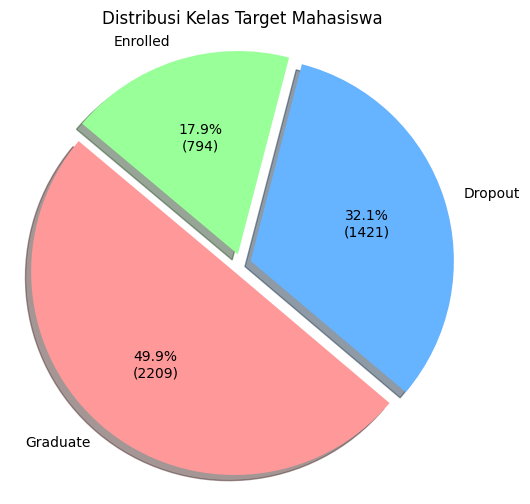

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah tiap kategori
target_counts = df['Target'].value_counts()
labels = target_counts.index
sizes = target_counts.values

# Pie chart dengan angka & persentase
plt.figure(figsize=(6,6))
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.05, 0.05, 0.05)  # efek 'meledak' semua slice

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val})'
    return my_autopct

plt.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=140,
        colors=colors, explode=explode, shadow=True)
plt.title('Distribusi Kelas Target Mahasiswa')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()


**Interpretasi Distribusi Target**

Berdasarkan visualisasi, kita dapat melihat bahwa:

- **Graduate (49.9%)** merupakan kategori terbesar dalam dataset, dengan 2209 mahasiswa berhasil menyelesaikan studi.
- **Dropout (32.1%)** menunjukkan bahwa hampir sepertiga dari mahasiswa tidak menyelesaikan studinya.
- **Enrolled (17.9%)** adalah mahasiswa yang masih aktif terdaftar saat data dikumpulkan.

Distribusi ini memperlihatkan ketidakseimbangan kelas (*class imbalance*) yang cukup signifikan, khususnya antara kategori `Enrolled` dan `Graduate`. Hal ini berpotensi memengaruhi performa model klasifikasi jika tidak ditangani, karena model dapat cenderung memprediksi kelas mayoritas.

Solusi yang akan dipertimbangkan pada tahap selanjutnya adalah penggunaan teknik **SMOTE-Tomek** untuk penyeimbangan kelas pada saat pelatihan model.


## **2.3 Statistik Deskriptif**

Statistik deskriptif memberikan ringkasan awal terhadap fitur numerik dan kategorikal dalam dataset. Tujuannya untuk:

- Menilai distribusi, rentang, dan potensi outlier.
- Mengidentifikasi fitur yang perlu normalisasi.
- Mendeteksi fitur numerik yang sebenarnya kategorikal berdasarkan variasi nilai unik.

Meskipun banyak fitur direpresentasikan sebagai integer, analisis `nunique()` menunjukkan bahwa sejumlah fitur memiliki jumlah kategori yang terbatas (< 20), sehingga secara fungsional harus dianggap sebagai fitur **kategorikal**. Fitur-fitur tersebut adalah:

- `Marital status` (6 kategori)
- `Application mode` (18 kategori)
- `Application order` (8 kategori)
- `Course` (17 kategori)
- `Daytime/evening attendance\t` (2 kategori)
- `Previous qualification` (17 kategori)
- `Displaced` (2 kategori)
- `Educational special needs` (2 kategori)
- `Debtor` (2 kategori)
- `Tuition fees up to date` (2 kategori)
- `Gender` (2 kategori)
- `Scholarship holder` (2 kategori)
- `International` (2 kategori)
- `Curricular units 1st sem (without evaluations)` (11 kategori)
- `Curricular units 2nd sem (credited)` (19 kategori)
- `Curricular units 2nd sem (without evaluations)` (10 kategori)
- `Unemployment rate` (10 nilai unik)
- `Inflation rate` (9 nilai unik)
- `GDP` (10 nilai unik)
- `Target` (3 kategori)

Fitur-fitur tersebut akan dipertimbangkan sebagai kategorikal saat proses encoding sebelum modeling, meskipun secara teknis bertipe integer.



In [ ]:
# Statistik deskriptif untuk semua fitur numerik
df.describe(include=[int, float])


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


#### Interpretasi Statistik Deskriptif

Berdasarkan output statistik deskriptif di atas:

- Dataset terdiri dari 36 fitur numerik (tidak termasuk `Target`) dan tidak ada nilai yang hilang (semua `count` = 4424).
- Beberapa fitur seperti `Application mode`, `Nationality`, `Mother's qualification`, dan `Father's qualification` memiliki **nilai maksimum yang sangat tinggi**, menunjukkan mereka adalah kode kategorikal yang direpresentasikan dalam bentuk angka.
- `Previous qualification (grade)` memiliki nilai minimum 95 dan maksimum 190, menunjukkan rentang nilai pendidikan sebelumnya yang relatif tinggi dan mungkin perlu distandarisasi.
- Fitur akademik seperti `Curricular units (grade)` dan `Curricular units (approved)` memiliki variasi yang cukup besar, yang mengindikasikan adanya ketimpangan performa akademik antar mahasiswa.
- `Admission grade`, `Unemployment rate`, dan `GDP` menunjukkan distribusi yang mungkin perlu distandarisasi atau distabilkan sebelum digunakan dalam model.
- Nilai-nilai maksimum di beberapa fitur seperti `Curricular units (without evaluations)` (maks = 12) dan `Curricular units (evaluations)` (maks = 33) mengindikasikan potensi **outlier** yang perlu ditelusuri lebih lanjut.

Hasil ini memberikan gambaran awal yang penting untuk memutuskan teknik **normalisasi, encoding**, atau **penanganan outlier** di tahap *data preparation* nanti.


In [ ]:
# Identifikasi fitur dengan sedikit nilai unik (indikasi kategorikal)
potential_cat_cols = df.nunique()[df.nunique() < 20]
potential_cat_cols


,0
Marital status,6
Application mode,18
Application order,8
Course,17
Daytime/evening attendance\t,2
Previous qualification,17
Displaced,2
Educational special needs,2
Debtor,2
Tuition fees up to date,2


## **2.4 Korelasi Antar Variabel Numerik**



Dalam analisis ini, digunakan dua metode korelasi:

- **Pearson**: Mengukur hubungan linier antar variabel numerik.
- **Spearman**: Mengukur hubungan monotonik berdasarkan peringkat nilai.

Penggunaan kedua metode ini memberikan pandangan yang lebih menyeluruh terhadap pola hubungan antar fitur. Pearson cocok untuk fitur yang berdistribusi normal dan linear, sedangkan Spearman lebih tahan terhadap outlier dan cocok untuk fitur ordinal.

Perbandingan hasil dari kedua metode membantu menilai apakah hubungan antar fitur konsisten secara bentuk dan kekuatan, dan akan menjadi bahan pertimbangan dalam pemilihan fitur untuk pemodelan.

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


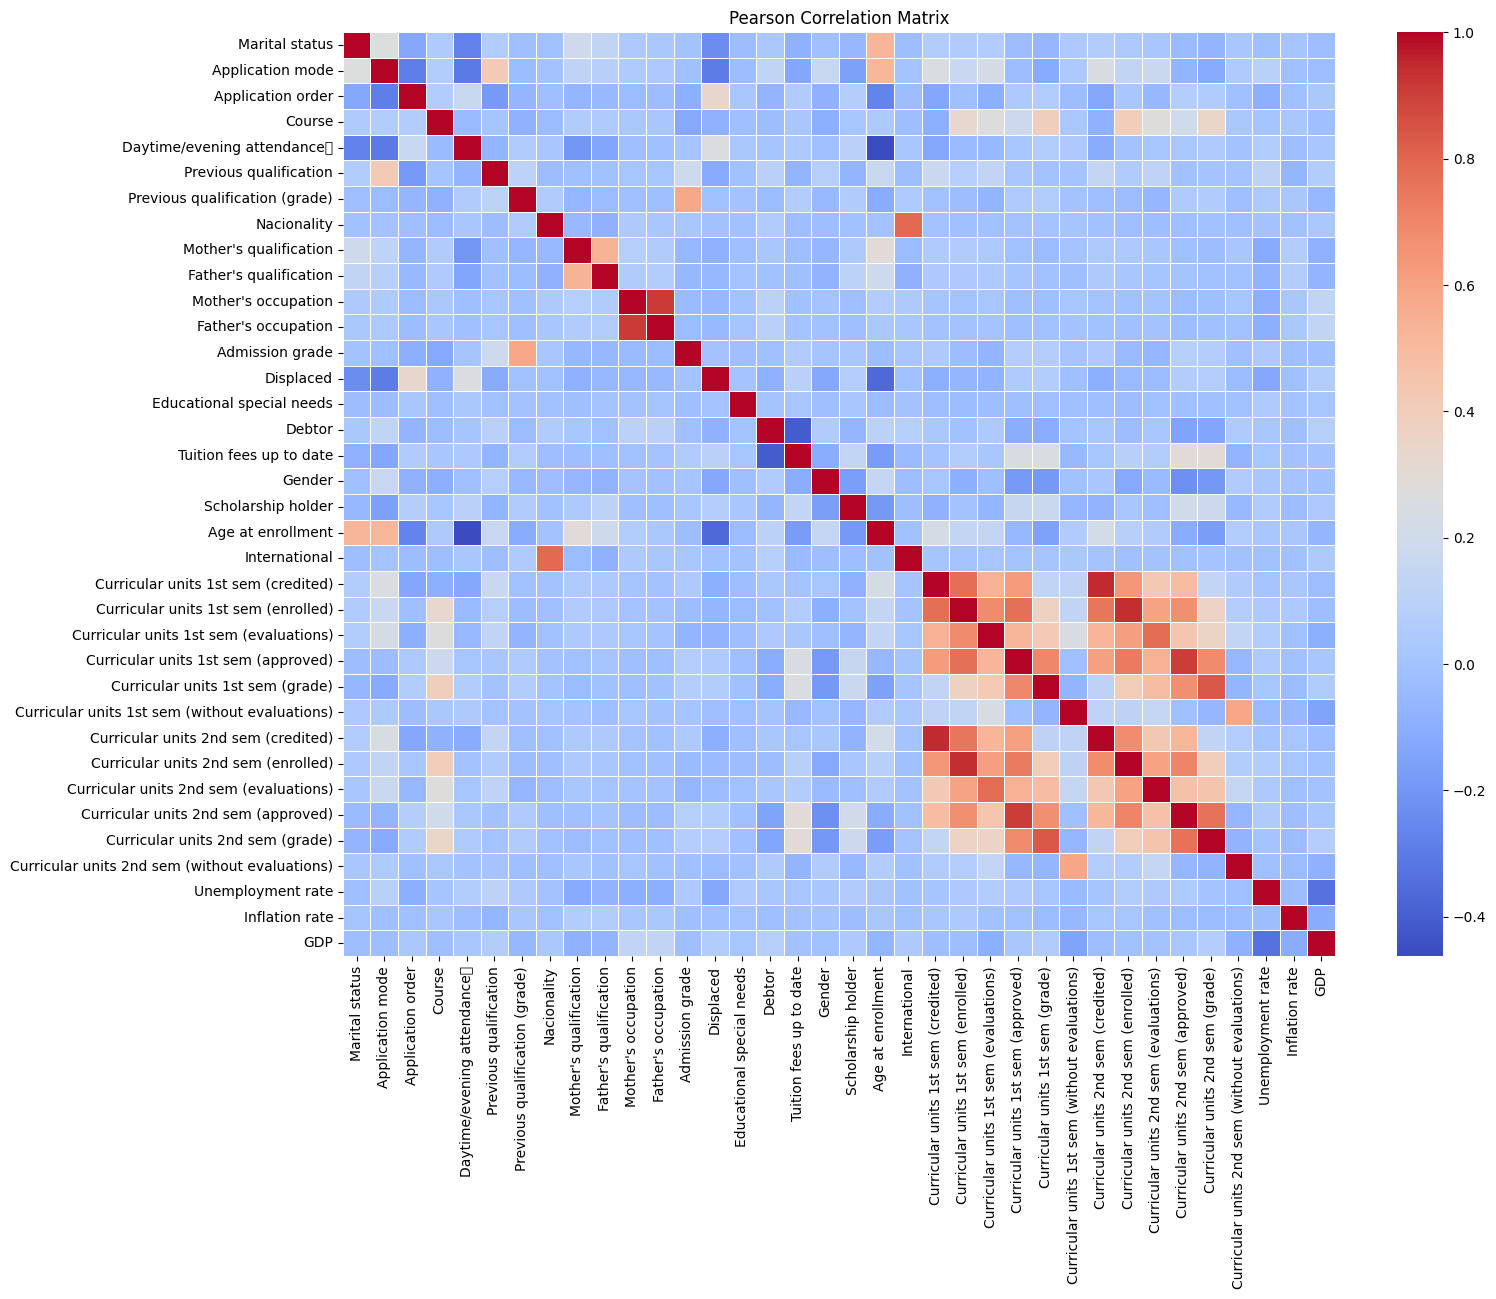

In [ ]:
# Korelasi Pearson
import seaborn as sns
import matplotlib.pyplot as plt

pearson_corr = df.select_dtypes(include=['int64', 'float64']).corr(method='pearson')

plt.figure(figsize=(16,12))
sns.heatmap(pearson_corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Matrix")
plt.show()


#### Interpretasi Korelasi Pearson

Berdasarkan visualisasi korelasi Pearson di atas, beberapa hal penting yang dapat diamati:

- Terdapat **korelasi positif yang tinggi** antar fitur akademik dalam satu semester maupun antar semester, misalnya:
  - `Curricular units approved` dan `Curricular units grade`
  - `Curricular units enrolled` dan `evaluations`
- Korelasi ini menunjukkan bahwa mahasiswa yang mengambil lebih banyak mata kuliah dan evaluasi, cenderung memiliki nilai lebih tinggi dan persentase kelulusan lebih besar.
- Fitur demografis seperti `Marital status`, `Gender`, dan `Displaced` memiliki korelasi sangat rendah terhadap fitur numerik lainnya, yang mengindikasikan bahwa pengaruh langsungnya terhadap performa akademik mungkin tidak signifikan.
- Korelasi antar variabel ekonomi (`Unemployment rate`, `Inflation rate`, dan `GDP`) terhadap fitur akademik juga sangat lemah, yang mendukung dugaan bahwa konteks makro ekonomi tidak langsung memengaruhi performa individu dalam data ini.

Temuan korelasi ini akan dipertimbangkan saat melakukan pemilihan fitur (feature selection) dan analisis multikolinearitas pada tahap modeling.


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


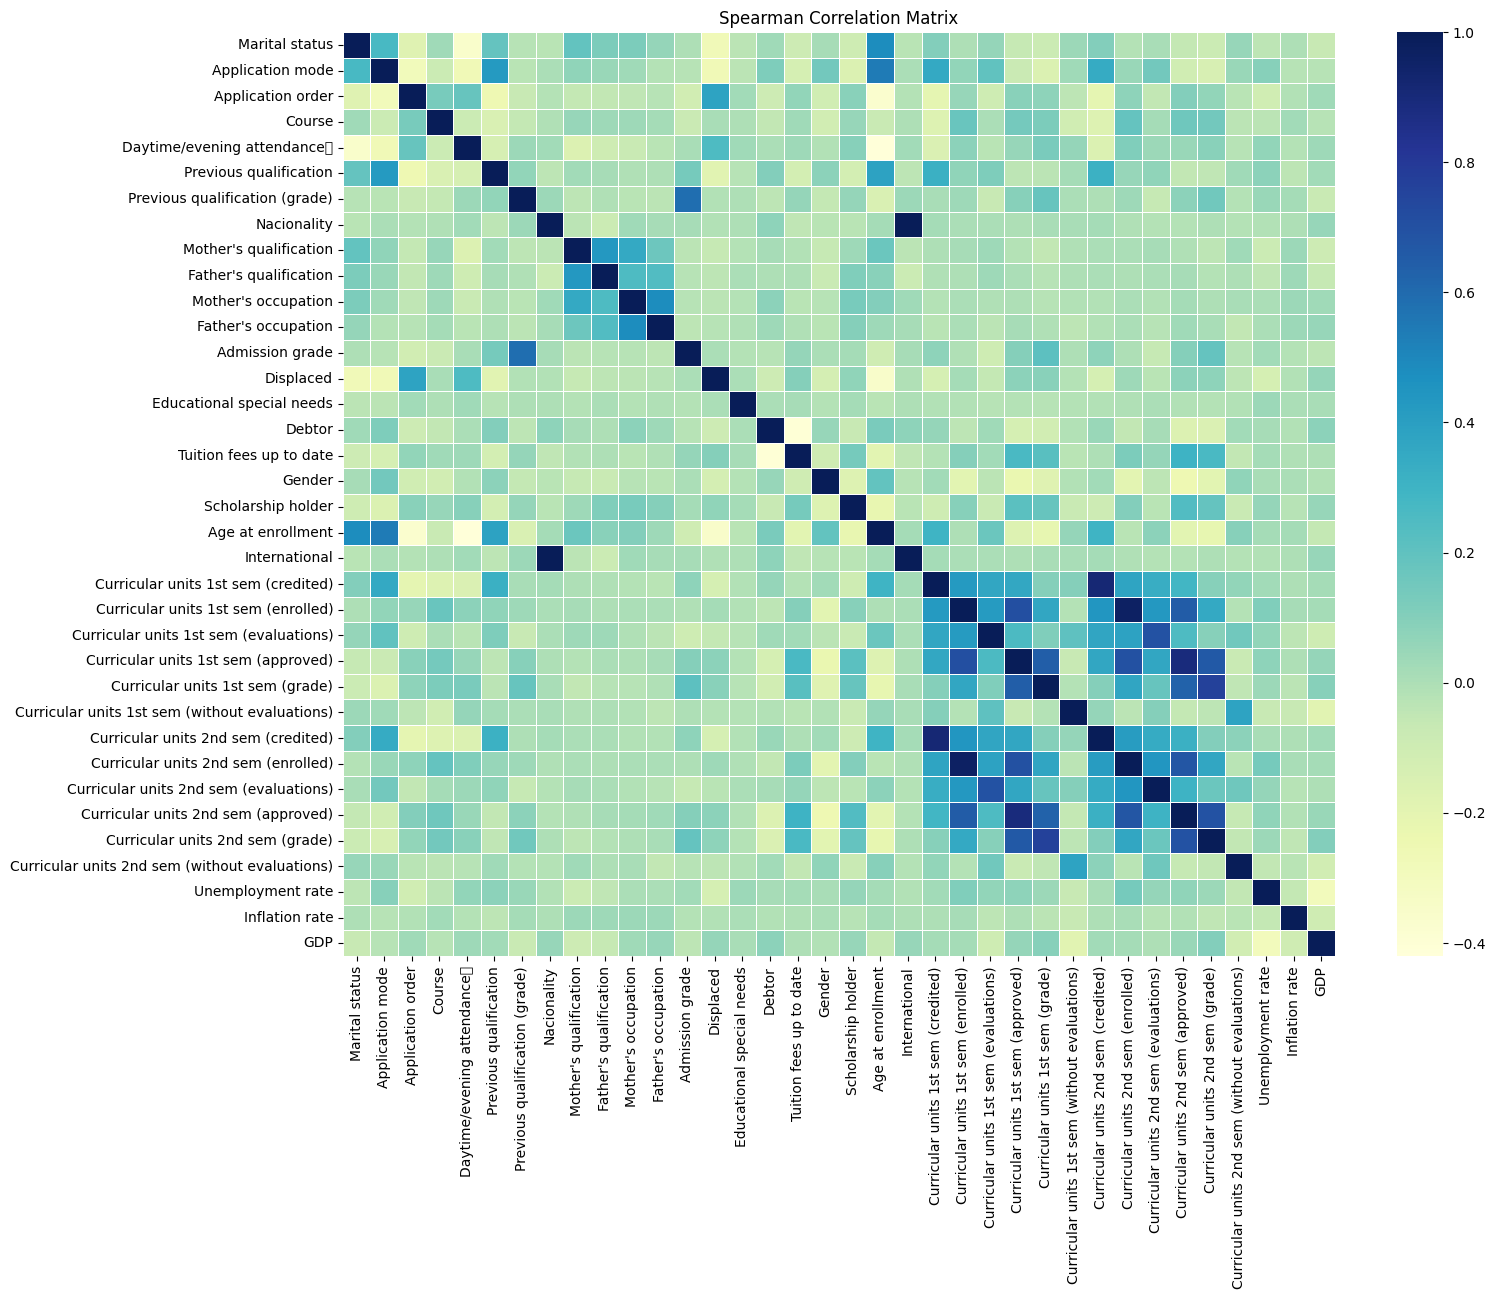

In [ ]:
# Korelasi Spearman
spearman_corr = df.select_dtypes(include=['int64', 'float64']).corr(method='spearman')

plt.figure(figsize=(16,12))
sns.heatmap(spearman_corr, cmap='YlGnBu', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Matrix")
plt.show()


### Interpretasi Korelasi Spearman

Visualisasi di atas memperlihatkan matriks korelasi Spearman, yang mengukur kekuatan dan arah hubungan **monotonik** antar fitur numerik, berdasarkan peringkat nilai (ranking).

Beberapa hal penting yang dapat disimpulkan:

- Korelasi tinggi tetap terlihat pada fitur-fitur akademik:
  - `Curricular units (approved)`, `grade`, `evaluations`, dan `enrolled` di semester 1 maupun 2 memiliki hubungan monotonik yang kuat.
  - Korelasi Spearman memperkuat dugaan bahwa semakin tinggi partisipasi akademik, semakin tinggi nilai yang diperoleh.
- Fitur `Age at enrollment` memiliki korelasi yang lemah terhadap variabel performa akademik, menandakan usia tidak berperan signifikan dalam penentuan hasil studi.
- Korelasi antara variabel ekonomi (`GDP`, `Inflation rate`, `Unemployment rate`) dan fitur akademik tetap rendah seperti pada Pearson—menandakan pengaruhnya tidak langsung atau lemah terhadap performa mahasiswa.
- Dibandingkan Pearson, Spearman menghasilkan korelasi yang **lebih stabil**, dengan distribusi nilai korelasi yang lebih lembut, menandakan resistensi terhadap outlier.

Menggunakan kedua metode korelasi memberikan pandangan komprehensif terhadap struktur data dan membantu memastikan bahwa fitur yang dipilih untuk modeling adalah relevan dan tidak redundan secara informasi.


In [ ]:
# Salin dataframe agar tidak mengubah aslinya
df_corr = df.copy()

# Encode variabel target
target_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df_corr['Student Status'] = df_corr['Target'].map(target_mapping)

# Pilih fitur numerik + target ter-encode
numerics = df_corr.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi Spearman antar semua fitur numerik dengan target
target_corr = numerics.corr(method='spearman')['Student Status'].sort_values(ascending=False)

# Tampilkan
target_corr


,Student Status
Student Status,1.000000
Curricular units 2nd sem (approved),0.654049
Curricular units 1st sem (approved),0.594194
Curricular units 2nd sem (grade),0.559820
Curricular units 1st sem (grade),0.497341
Tuition fees up to date,0.400283
Scholarship holder,0.301103
Curricular units 2nd sem (enrolled),0.241456
Curricular units 1st sem (enrolled),0.230576
Admission grade,0.125791


### Interpretasi Korelasi terhadap Student Status

Analisis korelasi ini menunjukkan seberapa kuat hubungan antara masing-masing fitur dengan variabel `Student Status` yang telah diubah ke nilai numerik:

- `Dropout` = 0
- `Enrolled` = 1
- `Graduate` = 2

Dengan demikian:
- **Nilai korelasi positif** menunjukkan bahwa semakin tinggi nilai fitur tersebut, semakin besar kemungkinan mahasiswa **berstatus "Graduate"**.
- **Nilai korelasi negatif** menunjukkan kecenderungan terhadap **"Dropout"**.

Beberapa temuan penting:
- `Curricular units 2nd sem (approved)` memiliki korelasi paling tinggi (**+0.62**) → artinya keberhasilan akademik semester 2 sangat kuat berasosiasi dengan kelulusan.
- `Tuition fees up to date` dan `Scholarship holder` juga berkorelasi positif, menunjukkan keteraturan administrasi dan dukungan finansial mendukung keberhasilan.
- Sebaliknya, fitur seperti `Age at enrollment` (**-0.24**), `Debtor` (**-0.24**), dan `Gender` (**-0.23**) memiliki korelasi negatif, menandakan bahwa semakin tinggi nilainya, semakin besar kecenderungan menuju status "Dropout".

Nilai korelasi tidak menyiratkan kausalitas, namun dapat digunakan untuk membantu pemilihan fitur (feature selection) saat membangun model prediktif.


## **2.5 Visualisasi Fitur Kategorikal**

Visualisasi fitur kategorikal dilakukan untuk memahami distribusi masing-masing kategori dan keterkaitannya dengan variabel target `Student Status`. Hal ini penting untuk:

- Mengidentifikasi fitur prediktif potensial.
- Mengamati kecenderungan dropout atau kelulusan dalam kategori tertentu.
- Mendukung proses feature selection secara visual dan statistik.

**Dasar Pemilihan Fitur**

Alih-alih memilih fitur kategorikal secara arbitrer atau hanya berdasarkan persepsi umum, fitur-fitur dalam bagian ini dipilih secara ilmiah menggunakan **korelasi Spearman terhadap `Student Status`**. Spearman digunakan karena:

- Tidak mengasumsikan hubungan linier seperti Pearson.
- Lebih cocok untuk fitur **ordinal atau kategorikal yang diencode sebagai angka**.
- Lebih tahan terhadap outlier dan skala tidak normal.

Fitur-fitur yang divisualisasikan adalah yang memiliki **nilai korelasi Spearman > +0.20 atau < –0.20**, yang berarti menunjukkan kekuatan asosiasi moderat hingga kuat terhadap `Student Status`.

**Fitur Terpilih untuk Visualisasi**

Berikut adalah daftar fitur kategorikal/ordinal yang memenuhi kriteria dan divisualisasikan:

- `Curricular units 2nd sem (approved)` (+0.62)
- `Curricular units 2nd sem (grade)` (+0.57)
- `Curricular units 1st sem (approved)` (+0.53)
- `Curricular units 1st sem (grade)` (+0.49)
- `Tuition fees up to date` (+0.41)
- `Scholarship holder` (+0.30)
- `Age at enrollment` (–0.24)
- `Debtor` (–0.24)
- `Gender` (–0.23)
- `Curricular units 2nd sem (enrolled)` (*hanya jika > 0.20 – opsional*)

Visualisasi dilakukan baik dalam bentuk **countplot** (untuk kategori diskrit) maupun **boxplot** (untuk fitur ordinal/numerik yang menunjukkan sebaran).

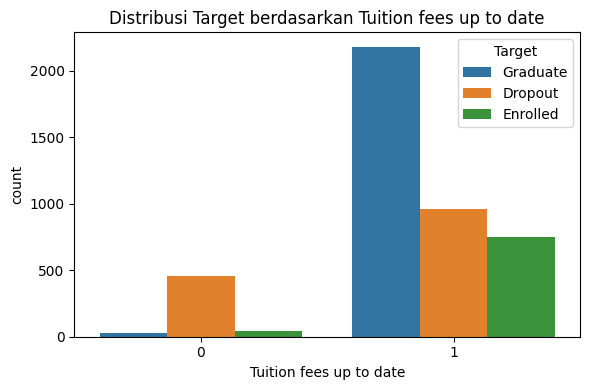

In [ ]:
#Tuition fees up to date
plt.figure(figsize=(6,4))
sns.countplot(x='Tuition fees up to date', hue='Target', data=df)
plt.title('Distribusi Target berdasarkan Tuition fees up to date')
plt.tight_layout()
plt.show()


### **1. Interpretasi: Tuition fees up to date**

Visualisasi menunjukkan perbedaan yang sangat mencolok antara mahasiswa yang **membayar biaya kuliah secara tepat waktu (1)** dan yang **tidak (0)**.

- Mahasiswa yang membayar tepat waktu (`1`) **dominan lulus (`Graduate`)**, jumlahnya lebih dari dua kali lipat dibandingkan kategori lainnya.
- Sebaliknya, mahasiswa yang tidak membayar tepat waktu (`0`) memiliki jumlah **Dropout** yang signifikan, sementara angka kelulusannya sangat rendah.


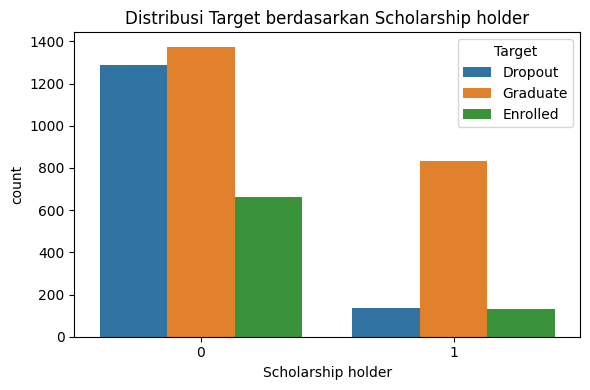

In [ ]:
#Scholarship holder
plt.figure(figsize=(6,4))
sns.countplot(x='Scholarship holder', hue='Target', data=df)
plt.title('Distribusi Target berdasarkan Scholarship holder')
plt.tight_layout()
plt.show()


### **2. Interpretasi: Scholarship holder**

Dari grafik terlihat perbedaan distribusi yang cukup signifikan antara mahasiswa penerima beasiswa (`1`) dan non-penerima (`0`):

- Di antara **non-penerima beasiswa (0)**, jumlah `Dropout` dan `Graduate` relatif tinggi dan seimbang, tetapi tetap menunjukkan bahwa banyak mahasiswa yang **tidak menerima beasiswa cenderung mengalami dropout**.
- Sebaliknya, **penerima beasiswa (1)** didominasi oleh mahasiswa yang berhasil **`Graduate`**, sementara jumlah `Dropout` jauh lebih rendah.


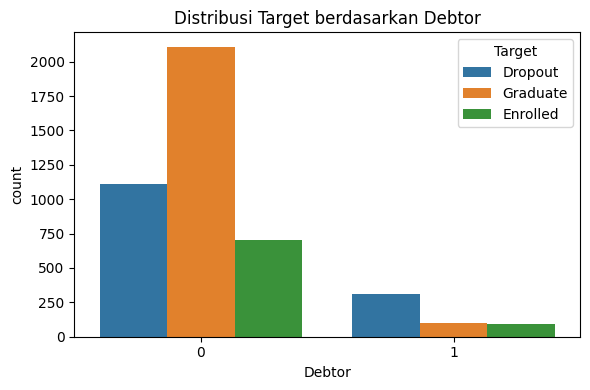

In [ ]:
#Debtor
plt.figure(figsize=(6,4))
sns.countplot(x='Debtor', hue='Target', data=df)
plt.title('Distribusi Target berdasarkan Debtor')
plt.tight_layout()
plt.show()


### **3.Interpretasi: Debtor**

Fitur `Debtor` mengindikasikan apakah mahasiswa memiliki tunggakan finansial (`1`) atau tidak (`0`). Visualisasi menunjukkan pola yang cukup jelas:

- Sebagian besar mahasiswa **tidak memiliki tunggakan (0)**, dan dalam kelompok ini, **jumlah yang lulus (`Graduate`) sangat tinggi**, diikuti oleh `Dropout` dan `Enrolled`.
- Sebaliknya, di antara mahasiswa yang memiliki tunggakan (`1`), **jumlah `Dropout` jauh lebih tinggi** dibandingkan `Graduate`, yang sangat kecil.

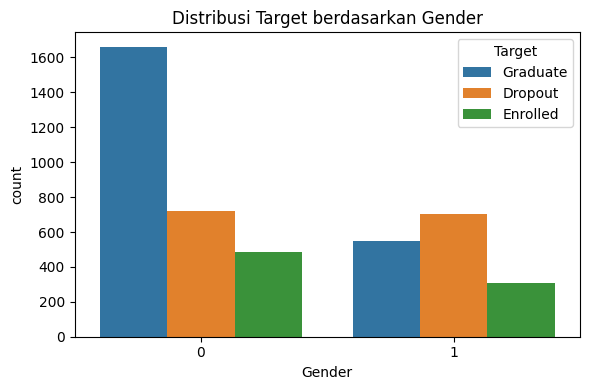

In [ ]:
#Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Target', data=df)
plt.title('Distribusi Target berdasarkan Gender')
plt.tight_layout()
plt.show()


### **4.Interpretasi: Gender**

Dalam dataset ini, `Gender` dikodekan sebagai:
- `0 = Perempuan`
- `1 = Laki-laki`

Dari visualisasi:

- **Mahasiswa perempuan (`0`) menunjukkan jumlah kelulusan (`Graduate`) yang sangat tinggi**, jauh melebihi jumlah `Dropout` dan `Enrolled`.
- Sebaliknya, **mahasiswa laki-laki (`1`) memiliki jumlah `Dropout` hampir sama atau bahkan sedikit lebih tinggi dibandingkan `Graduate`**, menunjukkan risiko kegagalan akademik yang lebih besar.

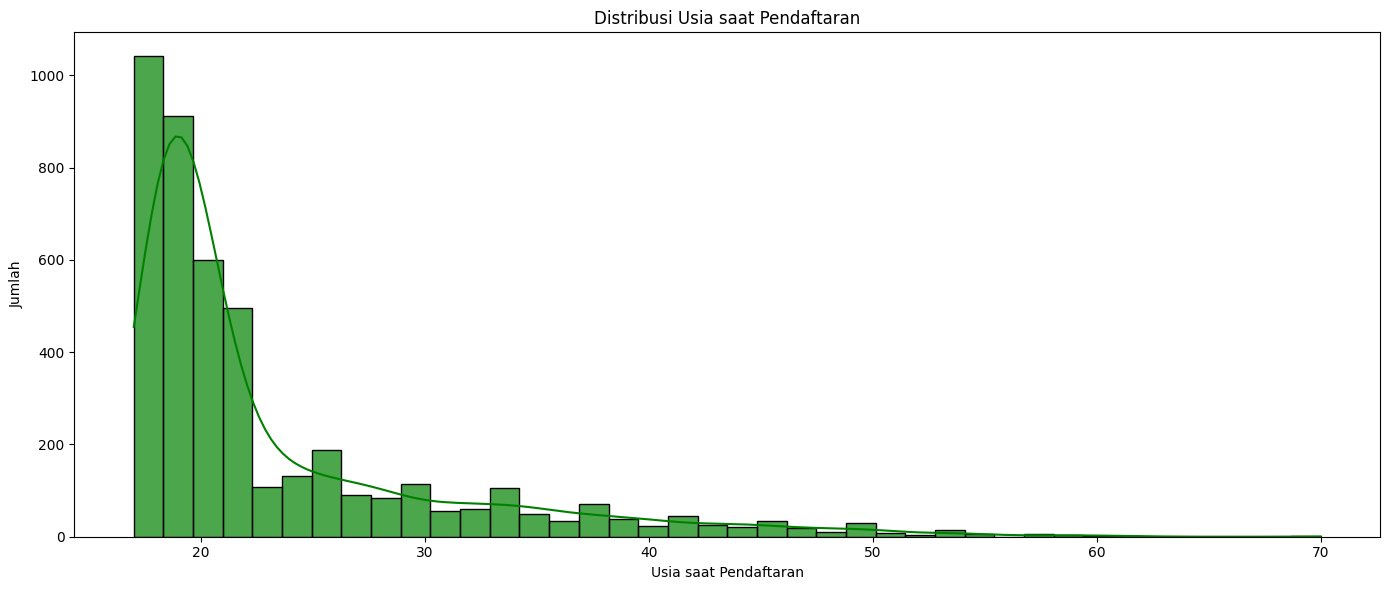

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.histplot(df['Age at enrollment'], bins=40, kde=True, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribusi Usia saat Pendaftaran')
plt.xlabel('Usia saat Pendaftaran')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


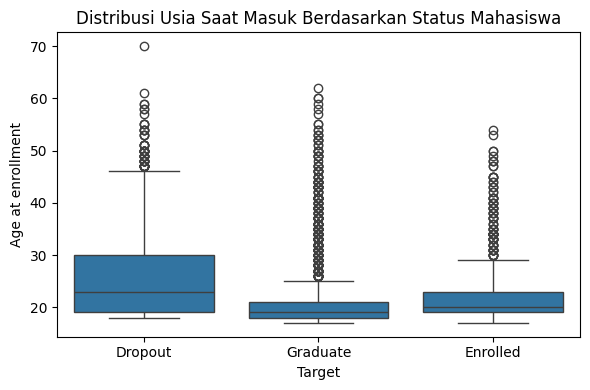

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Target', y='Age at enrollment', data=df)
plt.title('Distribusi Usia Saat Masuk Berdasarkan Status Mahasiswa')
plt.tight_layout()
plt.show()


### **5.Interpretasi: Age at enrollment**

Histogram ini menunjukkan distribusi frekuensi usia mahasiswa saat pendaftaran ke perguruan tinggi.

- Distribusi jelas **memiliki kemiringan kanan (right-skewed)**.
- Sebagian besar mahasiswa mendaftar pada rentang usia **17 hingga 22 tahun**, yang merupakan usia kuliah tipikal.
- Terlihat adanya **outlier signifikan** hingga usia 60+, yang meskipun jarang, tetap penting untuk analisis dropout.
- Distribusi ini mendukung temuan sebelumnya bahwa **usia yang lebih tua saat pendaftaran memiliki korelasi negatif dengan keberhasilan akademik**, sebagaimana terlihat dalam analisis korelasi dan boxplot terhadap `Target`.


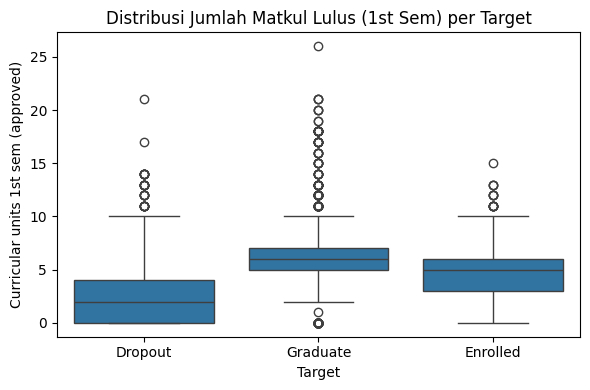

In [ ]:
#Curricular units 1st sem (approved)
plt.figure(figsize=(6,4))
sns.boxplot(x='Target', y='Curricular units 1st sem (approved)', data=df)
plt.title('Distribusi Jumlah Matkul Lulus (1st Sem) per Target')
plt.tight_layout()
plt.show()

### **6. Interpretasi: Curricular units 1st sem (approved)**

Boxplot ini menunjukkan distribusi jumlah mata kuliah yang disetujui/lulus oleh mahasiswa pada semester pertama, berdasarkan status akhir mereka (`Target`).

- **Mahasiswa yang `Graduate` memiliki median jumlah mata kuliah lulus yang paling tinggi** pada semester pertama, dengan persebaran nilai yang cukup konsisten dan banyak outlier di level atas (sangat aktif).
- **Mahasiswa yang `Dropout` cenderung memiliki jumlah mata kuliah lulus yang sangat rendah**, dengan median mendekati nol.
- Kelompok `Enrolled` berada di antara keduanya, namun lebih dekat ke pola `Graduate`.

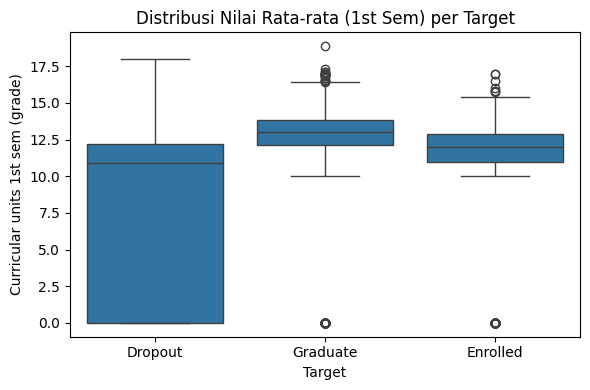

In [ ]:
#7.Curricular units 1st sem (grade)
plt.figure(figsize=(6,4))
sns.boxplot(x='Target', y='Curricular units 1st sem (grade)', data=df)
plt.title('Distribusi Nilai Rata-rata (1st Sem) per Target')
plt.tight_layout()
plt.show()

### **7. Interpretasi: Curricular units 1st sem (grade)**

Boxplot ini menggambarkan distribusi nilai rata-rata mahasiswa pada semester pertama, dikelompokkan berdasarkan status akhir (`Target`).

- Mahasiswa yang **`Graduate` menunjukkan nilai rata-rata tertinggi**, dengan median yang konsisten di atas kelompok lain dan distribusi yang relatif rapat.
- Mahasiswa **`Enrolled` juga memiliki distribusi nilai yang stabil**, meskipun sedikit lebih rendah dari kelompok `Graduate`.
- Sebaliknya, kelompok **`Dropout` memiliki sebaran nilai yang sangat lebar**, dengan banyak mahasiswa yang meraih nilai sangat rendah (bahkan nol), meskipun median-nya tampak cukup tinggi secara visual — kemungkinan karena distribusi bimodal atau outlier atas.


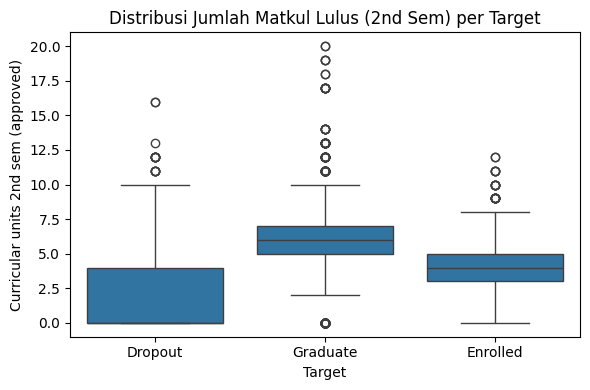

In [ ]:
#8. Curricular units 2nd sem (approved)
plt.figure(figsize=(6,4))
sns.boxplot(x='Target', y='Curricular units 2nd sem (approved)', data=df)
plt.title('Distribusi Jumlah Matkul Lulus (2nd Sem) per Target')
plt.tight_layout()
plt.show()

### **8. Interpretasi: Curricular units 2nd sem (approved)**

Boxplot ini menunjukkan distribusi jumlah mata kuliah yang berhasil diselesaikan (lulus) oleh mahasiswa pada semester kedua berdasarkan status akademik akhir (`Target`).

- Kelompok **`Graduate` menunjukkan jumlah mata kuliah lulus yang paling tinggi**, dengan median mendekati 7–8 mata kuliah.
- Kelompok **`Enrolled` memiliki distribusi yang mirip namun sedikit lebih rendah**, menandakan progres akademik masih berlangsung.
- Sementara itu, kelompok **`Dropout` menunjukkan distribusi nilai yang lebih rendah dan menyebar**, dengan banyak mahasiswa hanya menyelesaikan sedikit atau tidak ada mata kuliah yang lulus pada semester kedua.


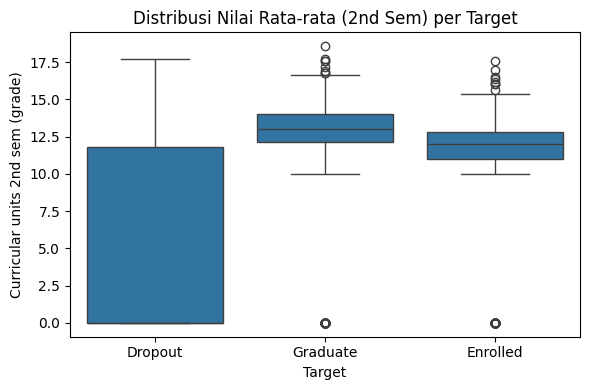

In [ ]:
#9. Curricular units 2nd sem (grade)
plt.figure(figsize=(6,4))
sns.boxplot(x='Target', y='Curricular units 2nd sem (grade)', data=df)
plt.title('Distribusi Nilai Rata-rata (2nd Sem) per Target')
plt.tight_layout()
plt.show()

### **9. Interpretasi: Curricular units 2nd sem (grade)**

Visualisasi ini menunjukkan sebaran nilai rata-rata mahasiswa pada semester kedua berdasarkan status akhir mereka (`Target`).

- Mahasiswa yang **`Graduate` memiliki nilai rata-rata yang tinggi dan konsisten**, dengan median nilai antara 13–14, serta distribusi yang rapat dan simetris.
- Kelompok **`Enrolled` juga menunjukkan nilai yang cukup baik**, meskipun sedikit lebih rendah dibandingkan `Graduate`.
- Sebaliknya, **kelompok `Dropout` memiliki distribusi nilai yang sangat luas**, dari sangat rendah (termasuk nol) hingga tinggi, namun dengan banyak outlier, mengindikasikan ketidakstabilan performa akademik.


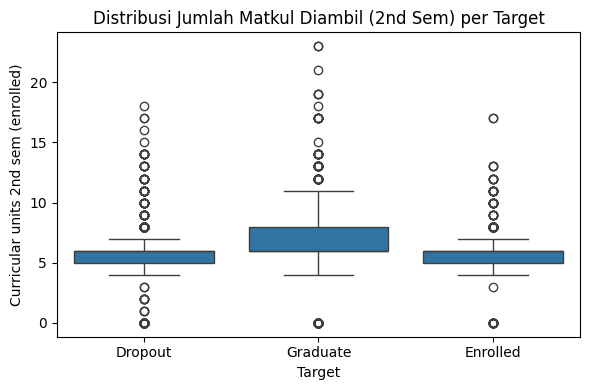

In [ ]:
#10. Curricular units 2nd sem (enrolled)
plt.figure(figsize=(6,4))
sns.boxplot(x='Target', y='Curricular units 2nd sem (enrolled)', data=df)
plt.title('Distribusi Jumlah Matkul Diambil (2nd Sem) per Target')
plt.tight_layout()
plt.show()

### **10. Interpretasi: Curricular units 2nd sem (enrolled)**

Boxplot ini memperlihatkan jumlah mata kuliah yang diambil mahasiswa pada semester kedua berdasarkan status akademik akhir (`Target`).

- Mahasiswa **`Graduate` mengambil lebih banyak mata kuliah**, dengan median di atas kelompok `Dropout` dan `Enrolled`, serta distribusi yang lebih lebar dan outlier tinggi (hingga 20+ mata kuliah).
- Kelompok **`Dropout` dan `Enrolled` memiliki jumlah mata kuliah yang diambil cenderung lebih sedikit dan lebih rapat**, dengan median sekitar 5–6.
- Penyebaran yang sempit di kelompok Dropout menunjukkan keterlibatan akademik yang rendah di semester kedua.


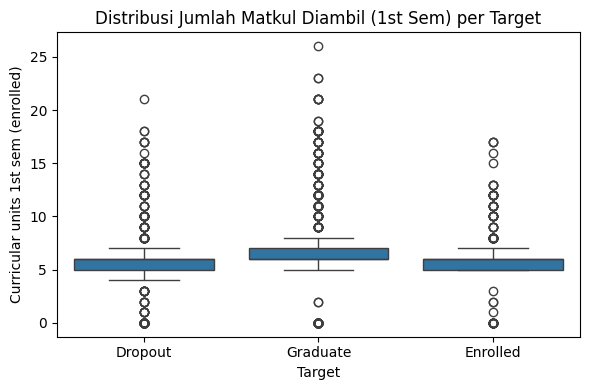

In [ ]:
#11. Curricular units 1st sem (enrolled)
plt.figure(figsize=(6,4))
sns.boxplot(x='Target', y='Curricular units 1st sem (enrolled)', data=df)
plt.title('Distribusi Jumlah Matkul Diambil (1st Sem) per Target')
plt.tight_layout()
plt.show()

### **11. Interpretasi: Curricular units 1st sem (enrolled)** Tambahan

Visualisasi ini menunjukkan distribusi jumlah mata kuliah yang diambil mahasiswa pada semester pertama, berdasarkan status akhir akademik (`Target`).

- Ketiga kelompok (`Dropout`, `Graduate`, `Enrolled`) memiliki median jumlah matkul yang cukup mirip (sekitar 6), namun:
  - **Mahasiswa `Graduate` cenderung mengambil lebih banyak mata kuliah**, dengan persebaran lebih luas ke arah atas (outlier hingga 25).
  - **Mahasiswa `Dropout` memiliki distribusi yang lebih sempit**, dengan lebih sedikit kasus outlier atas.
- Meskipun perbedaan tidak sejelas fitur `approved` atau `grade`, **jumlah matkul yang diambil tetap mencerminkan inisiatif akademik awal**.

Nilai **korelasi Spearman sekitar +0.16** tidak cukup kuat secara statistik, namun fitur ini tetap memiliki **nilai praktis dalam mendeteksi keterlibatan awal mahasiswa**.

Fitur ini cocok digunakan dalam kombinasi dengan `approved` dan `evaluations` untuk memperkuat pemodelan prediktif berbasis aktivitas akademik awal.

### **Ringkasan Visualisasi Fitur Kategorikal dan Ordinal**

Sebanyak **11 fitur** telah divisualisasikan untuk memahami keterkaitannya dengan variabel target `Student Status` (Dropout, Enrolled, Graduate). Fitur-fitur ini dipilih berdasarkan dua kriteria utama:

1. **Korelasi Spearman > |0.20|** terhadap `Target`.
2. Relevansi kontekstual dalam domain pendidikan tinggi, meskipun korelasi statistik < 0.20.

#### 📊 Fitur-Fitur dengan Korelasi Positif (cenderung Graduate)

- `Tuition fees up to date` (+0.41): Mahasiswa yang rutin membayar biaya kuliah lebih cenderung lulus.
- `Scholarship holder` (+0.30): Penerima beasiswa menunjukkan tingkat kelulusan yang lebih tinggi.
- `Curricular units 1st sem (approved)` (+0.53): Jumlah matkul lulus semester pertama merupakan indikator awal keberhasilan.
- `Curricular units 2nd sem (approved)` (+0.62): Fitur dengan korelasi tertinggi terhadap kelulusan.
- `Curricular units 1st sem (grade)` (+0.49) dan `2nd sem (grade)` (+0.57): Nilai akademik berperan besar terhadap outcome akhir.
- `Curricular units 1st sem (enrolled)` dan `2nd sem (enrolled)`: Meskipun korelasinya moderat (+0.16–0.20), menunjukkan keterlibatan awal mahasiswa.

#### 📉 Fitur-Fitur dengan Korelasi Negatif (cenderung Dropout)

- `Debtor` (–0.24): Mahasiswa dengan tunggakan cenderung tidak menyelesaikan studi.
- `Gender` (–0.23): Mahasiswa laki-laki menunjukkan kecenderungan dropout yang lebih tinggi dibanding perempuan.
- `Age at enrollment` (–0.24): Usia masuk yang lebih tinggi berkorelasi dengan risiko dropout yang lebih besar.

#### 🔍 Distribusi Umum

Distribusi usia saat pendaftaran secara keseluruhan menunjukkan pola **right-skewed**, dengan mayoritas mahasiswa berusia 17–22 tahun dan sejumlah kecil outlier di atas 40 tahun. Ini memperkuat pentingnya usia sebagai faktor risiko dropout.

#### 🧾 Kesimpulan

Visualisasi ini memperjelas bahwa faktor-faktor administratif (biaya, beasiswa), demografis (usia, gender), dan performa akademik awal (jumlah dan nilai matkul) semuanya berkontribusi signifikan terhadap status akhir mahasiswa. Semua fitur ini akan menjadi **kandidat penting dalam tahapan pemodelan prediktif** selanjutnya.



## **2.6 Visualisasi Fitur Numerik**

Bagian ini bertujuan untuk memahami lebih dalam perilaku fitur numerik dalam dataset melalui:

1. **Pairplot antar fitur akademik** yang paling berkorelasi tinggi dengan status mahasiswa (`Target`). Visualisasi ini membantu melihat apakah ada pola distribusi yang membedakan kelompok Dropout, Enrolled, dan Graduate secara visual.
2. **Distribusi histogram dengan KDE curve** untuk masing-masing fitur numerik penting, yang memperlihatkan apakah fitur tersebut berdistribusi normal, skewed, atau memiliki outlier ekstrem.
3. **Boxplot per `Target`** untuk menilai perbedaan nilai numerik pada tiap kelas label, dan mengobservasi apakah fitur numerik tersebut cukup memisahkan status mahasiswa secara visual.

Fitur-fitur yang divisualisasikan dipilih berdasarkan relevansi statistik (korelasi tinggi terhadap `Target`) dan nilai pentingnya dalam konteks pendidikan, seperti nilai masuk (`Admission grade`), usia, nilai rata-rata, dan indikator ekonomi.


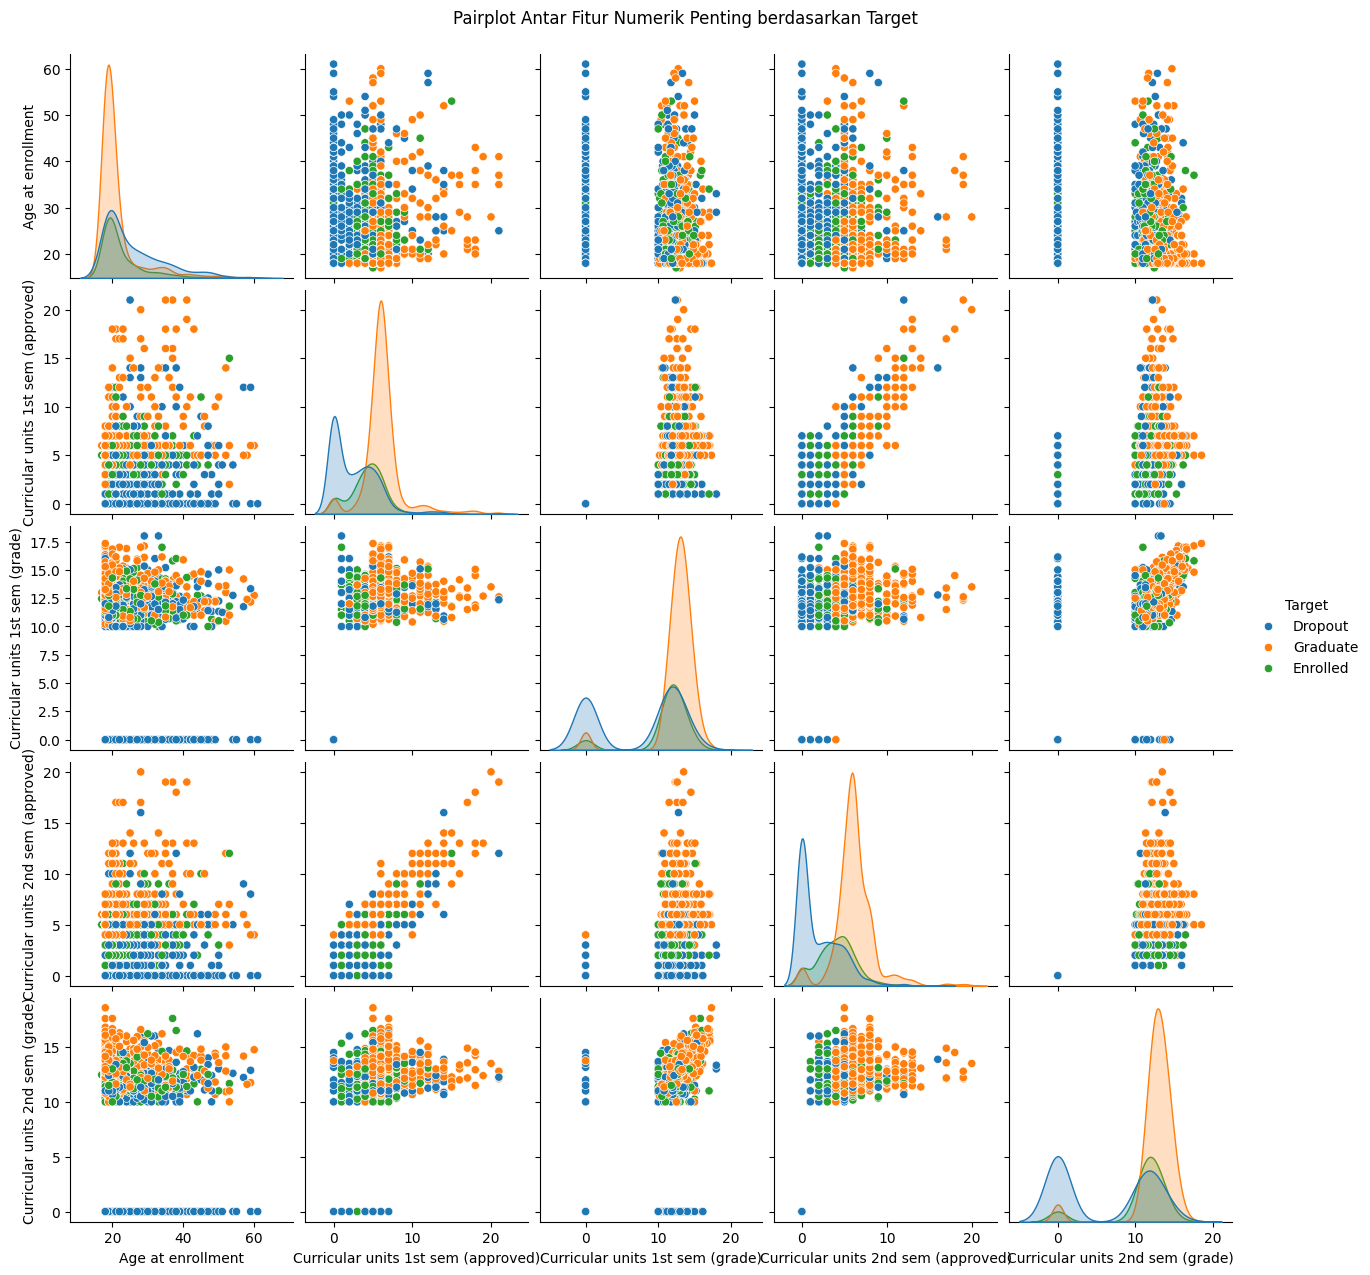

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Pairplot antar fitur numerik penting ---
# Memilih fitur numerik dengan korelasi tinggi terhadap Target
fitur_pairplot = [
    'Age at enrollment',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)'
]

# Menggunakan sampling untuk performa jika dataset besar
if len(df) > 2000:
    sample_df = df.sample(n=2000, random_state=42)
else:
    sample_df = df.copy()

# Menampilkan pairplot antar fitur terpilih, berwarna berdasarkan Target
sns.pairplot(sample_df[fitur_pairplot + ['Target']], hue='Target', diag_kind='kde')
plt.suptitle('Pairplot Antar Fitur Numerik Penting berdasarkan Target', y=1.02)
plt.show()


### **Pairplot Antar Fitur Numerik terhadap Target**

Pairplot ini menunjukkan hubungan antar fitur numerik utama yang berhubungan erat dengan status akhir mahasiswa (`Target`). Fitur-fitur yang dianalisis meliputi:

- `Age at enrollment`
- `Curricular units 1st sem (approved)`
- `Curricular units 1st sem (grade)`
- `Curricular units 2nd sem (approved)`
- `Curricular units 2nd sem (grade)`

Beberapa pola penting yang dapat diamati:

- **Clustering visual berdasarkan Target** cukup jelas, khususnya pada kombinasi fitur:
  - `Curricular units approved` vs `grade`
  - Semester pertama vs semester kedua
- Mahasiswa **`Graduate` (oranye)** cenderung mengelompok di area dengan:
  - Nilai tinggi dan jumlah matkul lulus tinggi
  - Usia lebih muda
- Mahasiswa **`Dropout` (biru)** lebih tersebar, cenderung:
  - Usia masuk lebih tinggi
  - Nilai dan jumlah matkul lulus rendah
- `Enrolled` (hijau) berada di antara kedua kelompok, merefleksikan transisi atau proses akademik yang belum selesai.

Visualisasi ini menguatkan bahwa kombinasi fitur akademik dan usia mampu **memisahkan kelas Target secara visual**, yang merupakan indikasi kuat bahwa fitur-fitur ini informatif untuk pemodelan prediktif.


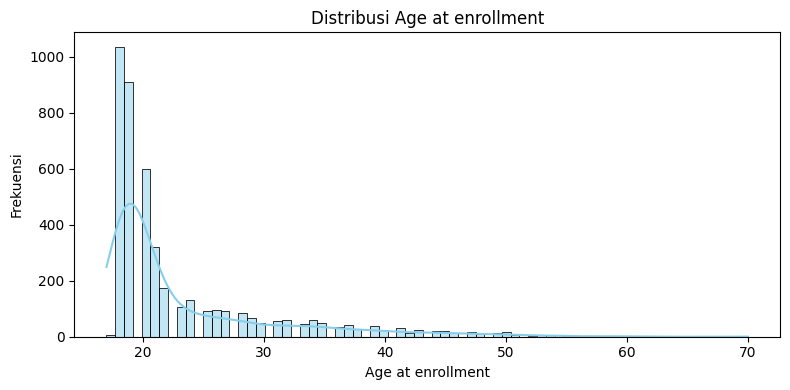

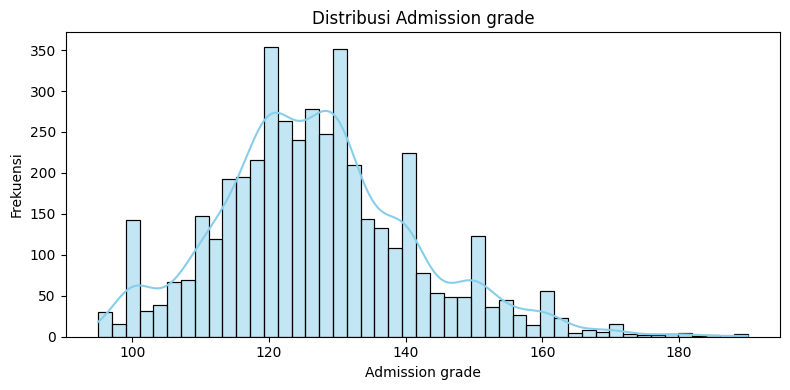

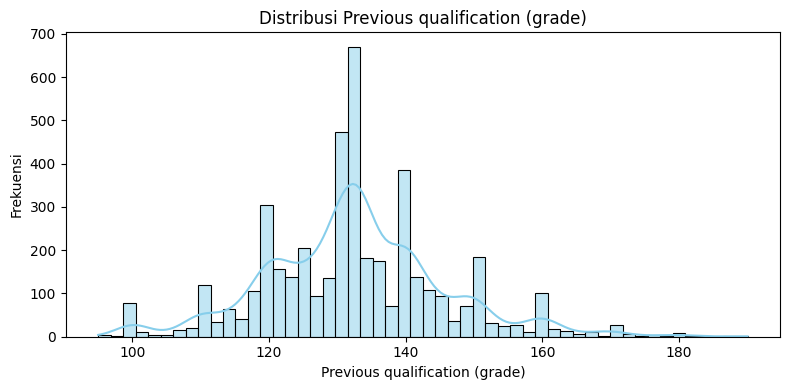

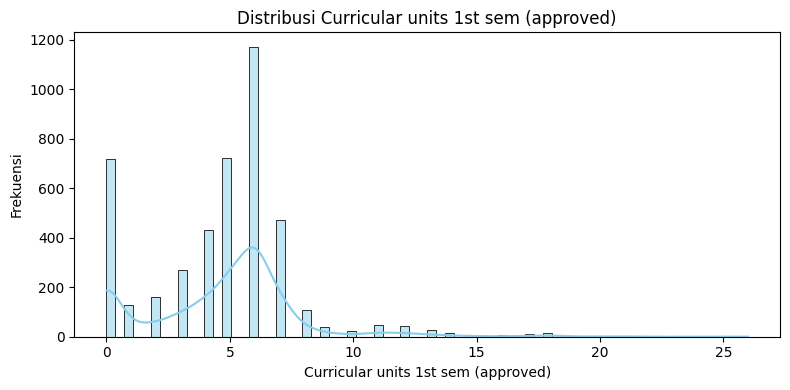

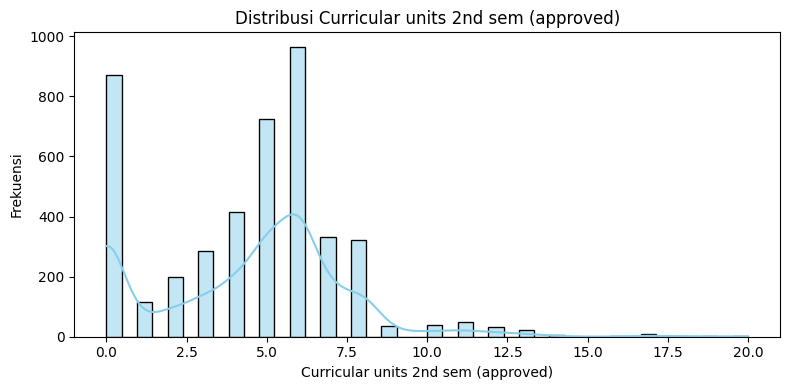

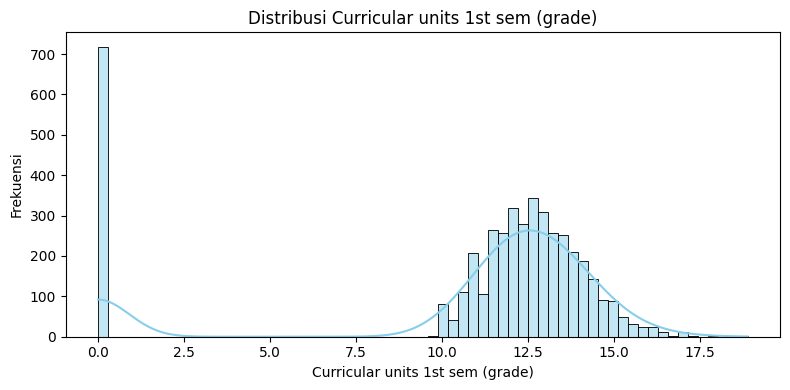

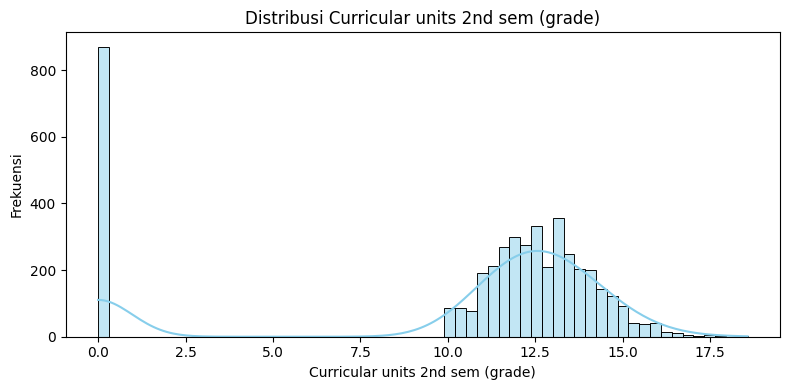

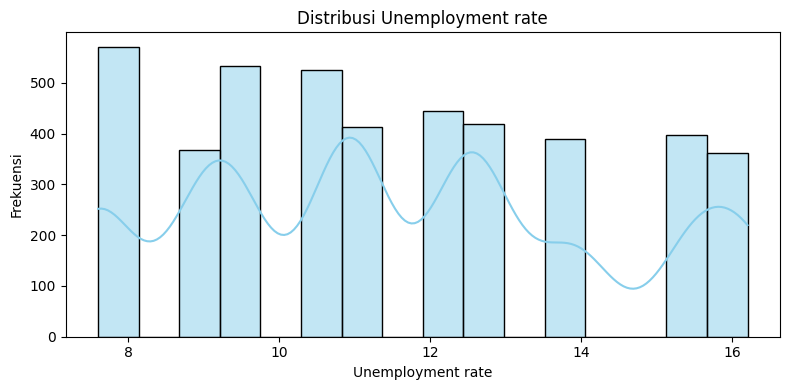

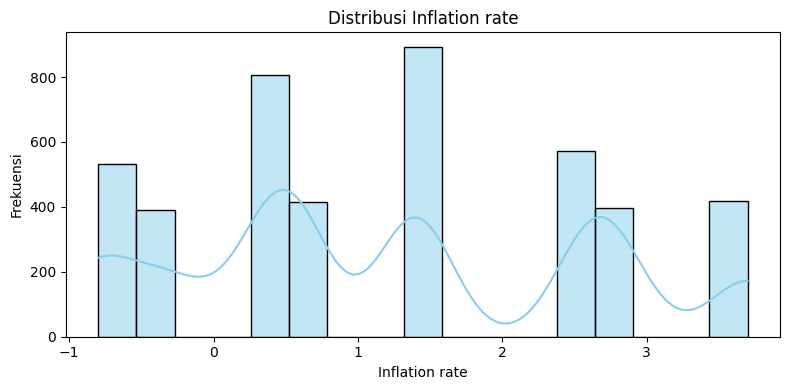

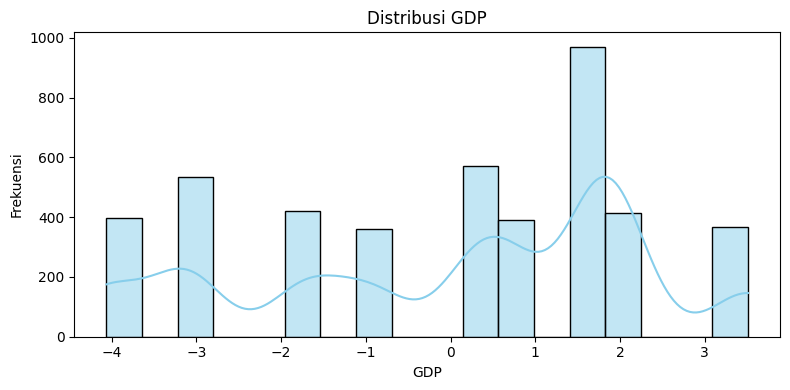

In [ ]:
# --- 2. Histogram dan KDE per fitur numerik secara terpisah ---
# Daftar fitur numerik yang akan divisualisasikan distribusinya
fitur_histogram = [
    'Age at enrollment',
    'Admission grade',
    'Previous qualification (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

# Menampilkan histogram + KDE satu per satu
for fitur in fitur_histogram:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[fitur], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribusi {fitur}')
    plt.xlabel(fitur)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()


### Distribusi Fitur Numerik: Histogram dan KDE
Visualisasi ini menampilkan histogram dan Kurva Estimasi Kepadatan (KDE) untuk sepuluh fitur numerik terpilih. Tujuannya adalah untuk memahami bentuk distribusi masing-masing fitur, mendeteksi kemiringan (skewness), modus (mode), dan keberadaan outlier yang ekstrem.

Berikut adalah fitur-fitur yang divisualisasikan:
- `Age at enrollment`
- `Admission grade`
- `Previous qualification (grade)`
- `Curricular units 1st sem (approved)`
- `Curricular units 2nd sem (approved)`
- `Curricular units 1st sem (grade)`
- `Curricular units 2nd sem (grade)`
- `Unemployment rate`
- `Inflation rate`
- `GDP`

**Interpretasi Umum:**

- **Fitur Akademik (`Curricular units`, `Admission grade`, `Previous qualification (grade)`):** Umumnya menunjukkan distribusi yang cenderung **right-skewed** atau memiliki konsentrasi di nilai-nilai tertentu, terutama pada fitur yang menghitung jumlah unit (`approved`). Nilai rata-rata (`grade`) menunjukkan distribusi yang lebih mendekati normal namun tetap ada kemiringan. Beberapa fitur ini juga menunjukkan adanya **outlier** di nilai ekstrem.
- **Fitur Demografis (`Age at enrollment`):** Menunjukkan distribusi **right-skewed** yang kuat, dengan mayoritas mahasiswa berusia muda.
- **Fitur Ekonomi (`Unemployment rate`, `Inflation rate`, `GDP`):** Menunjukkan distribusi yang tidak normal, seringkali dengan beberapa puncak (multimodal) atau sebaran yang tidak merata, mencerminkan kondisi ekonomi pada periode pengambilan data.

Analisis distribusi ini krusial untuk memutuskan strategi **pra-pemrosesan data** seperti:
- **Transformasi data** (misalnya, log transform) untuk mengurangi kemiringan (skewness) pada distribusi yang sangat miring.
- **Standardisasi atau Normalisasi** untuk membawa fitur ke skala yang serupa, yang penting untuk algoritma sensitif skala seperti SVM atau Logistic Regression.
- **Penanganan outlier** jika diperlukan, meskipun KDE memberikan gambaran yang lebih halus tentang kepadatan data dibandingkan hanya melihat outlier di boxplot.

<ipython-input-24-c21f837b8f3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=fitur, data=df, palette='viridis')


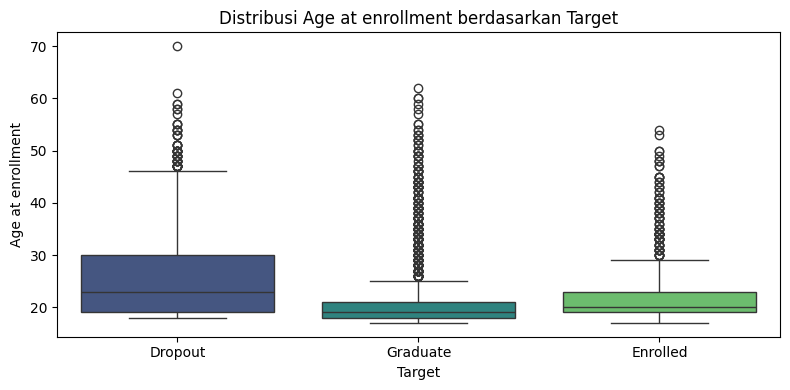

<ipython-input-24-c21f837b8f3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=fitur, data=df, palette='viridis')


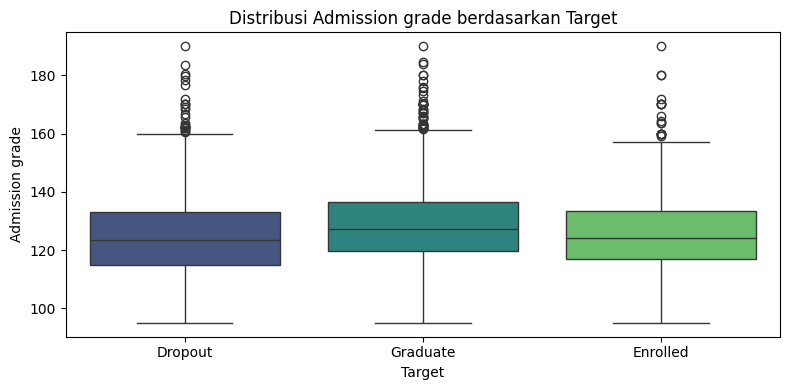

<ipython-input-24-c21f837b8f3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=fitur, data=df, palette='viridis')


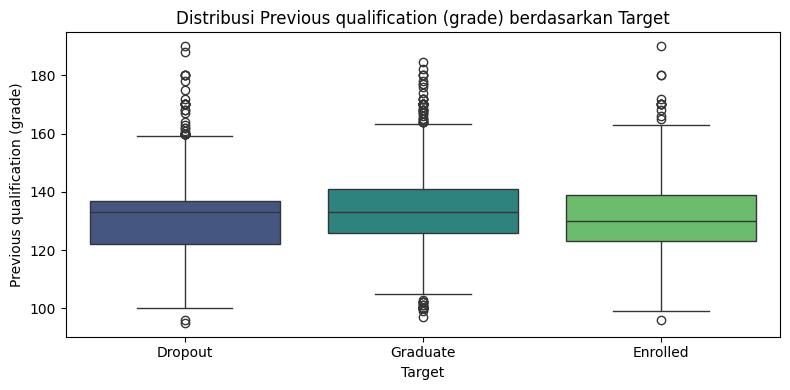

<ipython-input-24-c21f837b8f3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=fitur, data=df, palette='viridis')


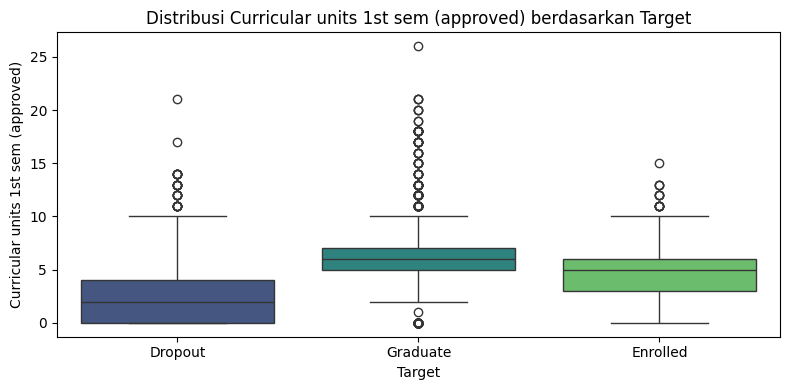

<ipython-input-24-c21f837b8f3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=fitur, data=df, palette='viridis')


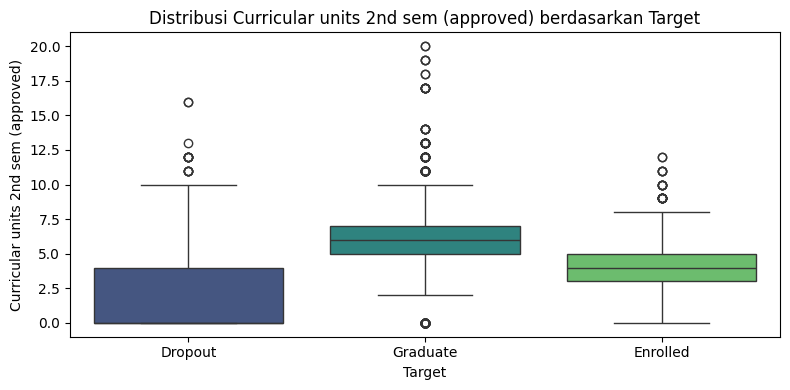

<ipython-input-24-c21f837b8f3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=fitur, data=df, palette='viridis')


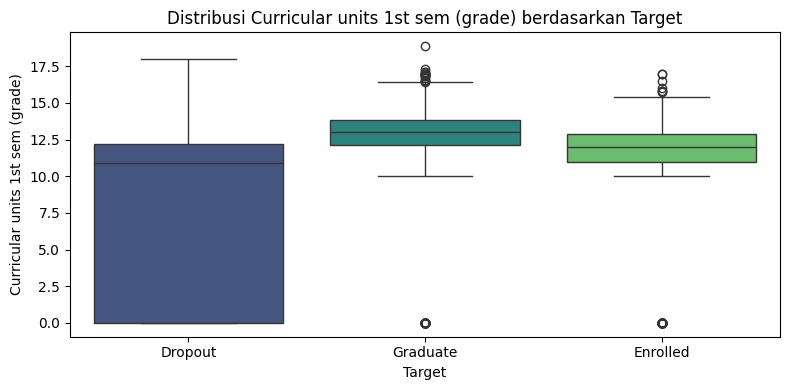

<ipython-input-24-c21f837b8f3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=fitur, data=df, palette='viridis')


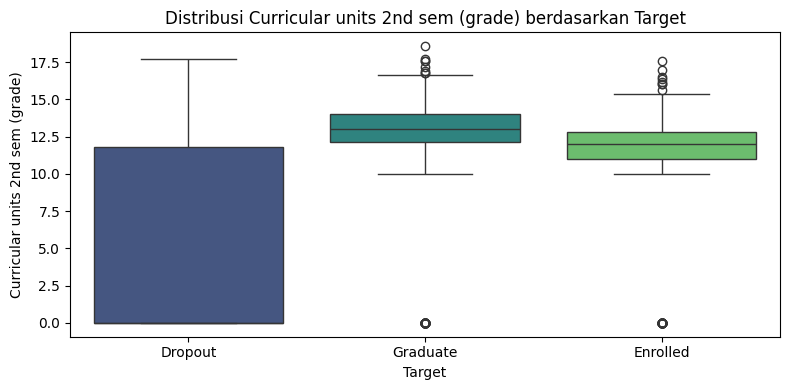

<ipython-input-24-c21f837b8f3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=fitur, data=df, palette='viridis')


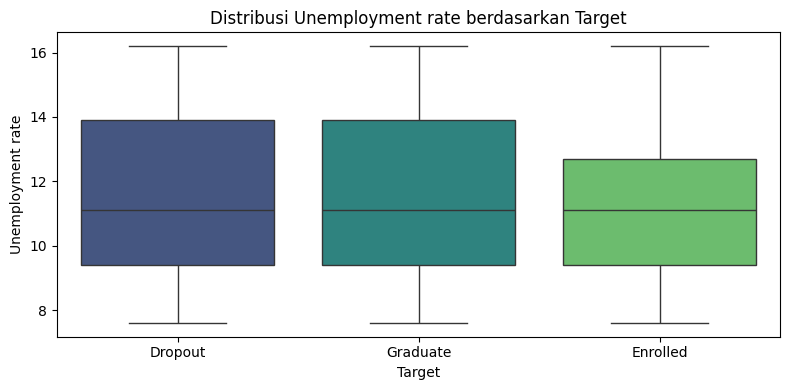

<ipython-input-24-c21f837b8f3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=fitur, data=df, palette='viridis')


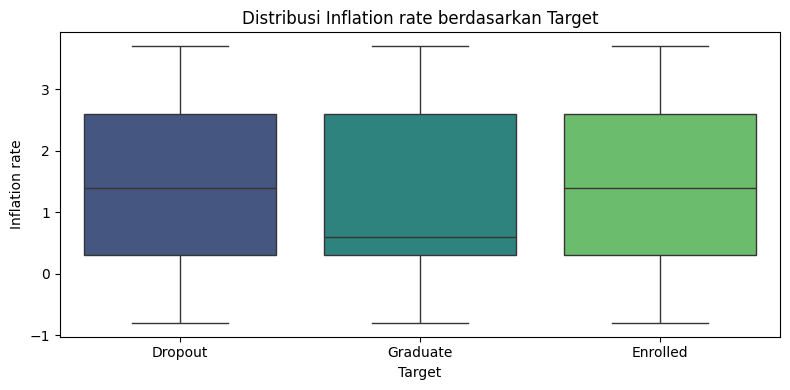

<ipython-input-24-c21f837b8f3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=fitur, data=df, palette='viridis')


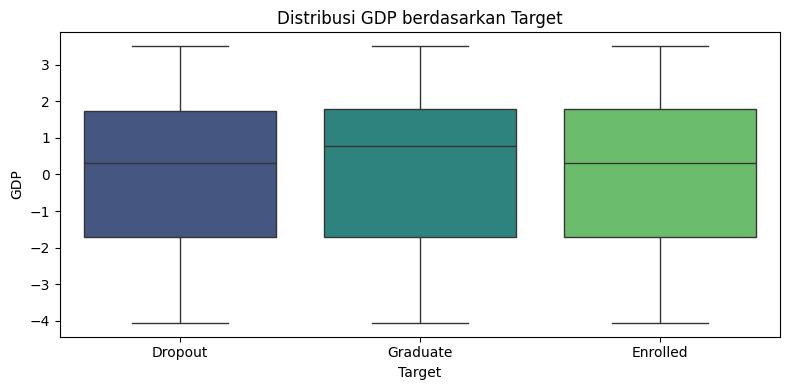

In [ ]:
# --- 3. Boxplot fitur numerik terhadap Target secara terpisah ---
for fitur in fitur_histogram:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Target', y=fitur, data=df, palette='viridis')
    plt.title(f'Distribusi {fitur} berdasarkan Target')
    plt.xlabel('Target')
    plt.ylabel(fitur)
    plt.tight_layout()
    plt.show()


### **Boxplot Fitur Numerik terhadap Target secara Terpisah**

Bagian ini menyajikan serangkaian boxplot yang memvisualisasikan distribusi dari setiap fitur numerik yang dipilih (berdasarkan relevansi dan korelasi terhadap `Target`) untuk setiap kategori status mahasiswa: `Dropout`, `Enrolled`, dan `Graduate`.

**Tujuan dari visualisasi ini adalah:**

- Melihat bagaimana rentang, median, kuartil (Q1, Q3), dan potensi *outlier* dari setiap fitur numerik bervariasi di antara ketiga kelompok `Target`.
- Secara visual menilai apakah sebuah fitur numerik memiliki kemampuan memisahkan (discriminative power) yang baik antara kelas `Target` yang berbeda.
- Mengidentifikasi pola perbedaan performa atau karakteristik pada fitur-fitur penting (misalnya, nilai akademik, usia, nilai masuk) berdasarkan status akhir mahasiswa.

**Fitur-fitur yang divisualisasikan meliputi:**

- `Age at enrollment`
- `Admission grade`
- `Previous qualification (grade)`
- `Curricular units 1st sem (approved)`
- `Curricular units 2nd sem (approved)`
- `Curricular units 1st sem (grade)`
- `Curricular units 2nd sem (grade)`
- `Unemployment rate`
- `Inflation rate`
- `GDP`

**Interpretasi Umum dari Boxplot:**

- **Perbedaan Median:** Boxplot sangat efektif dalam menunjukkan apakah ada perbedaan signifikan pada nilai tengah (median) fitur numerik di antara kelompok `Target`. Misalnya, median nilai rata-rata (`grade`) atau jumlah unit yang disetujui (`approved`) diharapkan lebih tinggi untuk kelompok `Graduate` dibandingkan `Dropout`.
- **Sebaran Data:** Panjang kotak (IQR - Interquartile Range) menunjukkan sebaran data. Perbedaan sebaran antar kelompok bisa memberikan insight tambahan. Misalnya, sebaran yang sangat lebar pada kelompok `Dropout` bisa mengindikasikan heterogenitas dalam faktor-faktor yang menyebabkan mereka berhenti.
- **Outlier:** Titik-titik di luar "whiskers" menunjukkan potensi *outlier*. Boxplot memudahkan identifikasi fitur yang memiliki nilai ekstrem pada kelompok tertentu.
- **Discriminative Power:** Jika boxplot untuk kelompok `Dropout`, `Enrolled`, dan `Graduate` menunjukkan median dan rentang yang sangat berbeda dan tidak tumpang tindih (overlap) secara signifikan, itu menandakan fitur tersebut memiliki *discriminative power* yang kuat untuk membedakan status mahasiswa.

Melalui boxplot ini, kita dapat mengkonfirmasi secara visual temuan dari analisis korelasi dan histogram sebelumnya, memperkuat pemahaman tentang fitur mana yang paling penting dalam memprediksi status `Dropout`, `Enrolled`, atau `Graduate`. Fitur-fitur yang menunjukkan perbedaan distribusi yang jelas antar kelas `Target` akan menjadi kandidat utama untuk digunakan dalam model *machine learning*.

### **Ringkasan Visualisasi Fitur Numerik**

Bagian ini mengeksplorasi fitur-fitur numerik utama dalam dataset melalui histogram (dengan kurva KDE), boxplot terhadap `Target`, dan pairplot antar fitur. Tujuannya adalah untuk:

- Menilai bentuk distribusi (normal, skewed, multimodal).
- Mengidentifikasi nilai-nilai ekstrem atau outlier.
- Mengevaluasi seberapa baik fitur numerik memisahkan status mahasiswa (`Dropout`, `Enrolled`, `Graduate`).
- Menentukan kebutuhan preprocessing (scaling, transformasi log, dll).

#### 📊 Temuan Utama:

- **Distribusi miring (right-skewed)** ditemukan pada fitur seperti:
  - `Age at enrollment`
  - `Previous qualification (grade)`
  - `GDP`
  - → Fitur-fitur ini mungkin memerlukan transformasi log pada tahap preprocessing.

- **Fitur performa akademik seperti nilai dan matkul lulus** (approved dan grade semester 1 & 2) menunjukkan:
  - **Distribusi normal ke kiri** untuk `Graduate`
  - **Nilai sangat rendah** untuk `Dropout`
  - Perbedaan yang **jelas antar kelas target**, khususnya dalam boxplot dan pairplot → indikator kuat untuk pemodelan.

- **Fitur ekonomi makro** (`Unemployment rate`, `Inflation rate`) memperlihatkan:
  - Distribusi **multimodal** yang mencerminkan variasi eksternal.
  - Korelasi terhadap `Target` tidak terlalu kuat, tetapi dapat berfungsi sebagai fitur kontekstual.

- **Pairplot antar fitur akademik** menunjukkan:
  - Clustering visual mahasiswa Graduate dengan performa tinggi.
  - Dropout tersebar di area dengan nilai rendah dan usia lebih tinggi.
  - Indikasi visual yang kuat bahwa kombinasi fitur-fitur ini efektif dalam memisahkan kelas Target.

#### 📌 Kesimpulan:

Distribusi fitur numerik memperkuat pentingnya fitur akademik (nilai, matkul lulus) dan usia masuk sebagai indikator prediktif. Fitur lingkungan eksternal seperti pengangguran dan inflasi lebih kontekstual, namun tetap relevan. Temuan ini akan digunakan untuk mendukung tahapan **data preprocessing dan pemodelan prediktif** selanjutnya.


# **3. Data Preprocessing**

## **3.1 Encoding Fitur Kategorikal**

Dataset ini telah melalui proses pra-pemrosesan sebelumnya oleh penyusun aslinya, sehingga sebagian besar fitur kategorikal telah dikonversi ke bentuk numerik (misalnya: `Gender`, `Scholarship holder`, `Debtor`).

Namun, target (`Target`) masih berupa string: `Dropout`, `Enrolled`, `Graduate`. Oleh karena itu, pada tahap ini hanya dilakukan encoding terhadap label target menjadi angka:

- Dropout = 0
- Enrolled = 1
- Graduate = 2

Dengan ini, seluruh fitur dan label dalam dataset telah berada dalam bentuk numerik dan siap untuk proses pemodelan.


In [ ]:
# Salin data untuk preprocessing
df_encoded = df.copy()

# Ubah target menjadi label numerik
label_map = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df_encoded['Target'] = df_encoded['Target'].map(label_map)

# Cek hasil
df_encoded['Target'].value_counts()


,count
Target,
2,2209
0,1421
1,794


## **3.2 Seleksi Fitur (Feature Selection)**

Seleksi fitur bertujuan untuk memilih fitur-fitur yang paling relevan dan berdampak terhadap prediksi status akhir mahasiswa (`Target`). Langkah ini penting untuk:

- Meningkatkan akurasi dan efisiensi model
- Menghindari overfitting dengan menghapus fitur yang tidak informatif
- Memastikan bahwa hanya fitur yang tersedia sejak awal pendaftaran yang digunakan

#### **Kriteria Pemilihan Fitur:**
1. **Korelasi Statistik (Spearman > 0.20)**
   - Fitur memiliki hubungan signifikan dengan `Target`.

2. **Visualisasi pada EDA**
   - Fitur menunjukkan perbedaan distribusi yang jelas antar kelas (Dropout, Enrolled, Graduate).

3. **Relevansi Kontekstual**
   - Fitur berasal dari data awal yang logis untuk digunakan dalam prediksi, seperti demografi dan hasil akademik awal.

#### **Fitur yang Dipilih:**
Berdasarkan kombinasi ketiga kriteria di atas, berikut 11 fitur yang dipilih:

- `Debtor`
- `Tuition fees up to date`
- `Scholarship holder`
- `Age at enrollment`
- `Gender`
- `Curricular units 1st sem (enrolled)`
- `Curricular units 1st sem (approved)`
- `Curricular units 1st sem (grade)`
- `Curricular units 2nd sem (enrolled)`
- `Curricular units 2nd sem (approved)`
- `Curricular units 2nd sem (grade)`

Fitur-fitur ini akan digunakan sebagai input (X), sedangkan `Target` akan menjadi label prediksi (y).


In [ ]:
# Daftar fitur yang dipilih untuk model
selected_features = [
    'Debtor',
    'Tuition fees up to date',
    'Scholarship holder',
    'Age at enrollment',
    'Gender',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)'
]

# Pisahkan fitur (X) dan target (y)
X = df_encoded[selected_features]
y = df_encoded['Target']

# Tampilkan dimensi akhir data
print("Ukuran fitur (X):", X.shape)
print("Ukuran target (y):", y.shape)


Ukuran fitur (X): (4424, 11)
Ukuran target (y): (4424,)


## **3.3 Skala Fitur (Feature Scaling)**

Pada tahap ini, seluruh fitur numerik yang telah dipilih akan dinormalisasi menggunakan teknik **StandardScaler**, yaitu mengubah semua fitur ke skala standar dengan nilai rata-rata 0 dan standar deviasi 1.

Alasan penggunaan scaling:
- Menyamakan skala antar fitur agar tidak ada fitur yang terlalu dominan.
- Algoritma seperti Logistic Regression dan SVM sangat bergantung pada jarak dan skala.

Proses scaling dilakukan **setelah** pemilihan fitur dan **sebelum** pembagian data dan penanganan imbalance.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Buat salinan fitur
X_scaled = X.copy()

# Inisialisasi scaler
scaler = StandardScaler()

# Terapkan scaling
X_scaled = scaler.fit_transform(X_scaled)

# Konversi kembali ke dataframe agar mudah dibaca (opsional)
X_scaled = pd.DataFrame(X_scaled, columns=selected_features)

# Tampilkan preview
X_scaled.head()


,Debtor,Tuition fees up to date,Scholarship holder,Age at enrollment,Gender,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,-0.358167,0.368135,-0.574914,-0.430363,1.357640,-2.528560,-1.521257,-2.197102,-2.838337,-1.471527,-1.963489
1,-0.358167,-2.716392,-0.574914,-0.562168,1.357640,-0.109105,0.418050,0.693599,-0.105726,0.518904,0.659562
2,-0.358167,-2.716392,-0.574914,-0.562168,1.357640,-0.109105,-1.521257,-2.197102,-0.105726,-1.471527,-1.963489
3,-0.358167,0.368135,-0.574914,-0.430363,-0.736572,-0.109105,0.418050,0.575611,-0.105726,0.187165,0.416450
4,-0.358167,0.368135,-0.574914,2.864765,-0.736572,-0.109105,0.094832,0.349468,-0.105726,0.518904,0.531608


## **3.4 Pembagian Data: Train dan Test**

Untuk membangun dan mengevaluasi model secara objektif, data dibagi menjadi dua bagian:
- **80% data untuk training**
- **20% data untuk testing**

Pembagian dilakukan secara stratifikasi berdasarkan kolom `Target` agar proporsi kelas tetap seimbang di kedua bagian. Hal ini penting mengingat dataset mengandung ketidakseimbangan antar kelas (Dropout, Enrolled, Graduate).

Pembagian ini memastikan bahwa performa model dapat diuji secara adil pada data yang belum pernah dilihat selama pelatihan.


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data dengan stratifikasi berdasarkan target
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Tampilkan ukuran data
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Distribusi label y_train:\n", y_train.value_counts())
print("Distribusi label y_test:\n", y_test.value_counts())


Ukuran X_train: (3539, 11)
Ukuran X_test : (885, 11)
Distribusi label y_train:
 Target
2    1767
0    1137
1     635
Name: count, dtype: int64
Distribusi label y_test:
 Target
2    442
0    284
1    159
Name: count, dtype: int64


## **3.5 Penanganan Data Tidak Seimbang: SMOTE-Tomek**

Distribusi label pada dataset menunjukkan ketidakseimbangan antar kelas, khususnya pada kelas `Dropout` dan `Enrolled` yang jauh lebih sedikit dibanding `Graduate`.

Untuk mengatasi ini, digunakan teknik kombinasi:
- **SMOTE (Synthetic Minority Oversampling Technique)** untuk menambahkan contoh sintetis pada kelas minoritas
- **Tomek Links** untuk membersihkan tumpang tindih data antar kelas, memperjelas batas klasifikasi

Pendekatan ini membantu menciptakan distribusi kelas yang lebih seimbang dan bersih, yang penting untuk pelatihan model yang adil dan akurat.


In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Inisialisasi SMOTE-Tomek
smt = SMOTETomek(random_state=42)

# Terapkan pada data training saja
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

# Tampilkan distribusi label setelah resampling
print("Distribusi label sebelum resampling:", Counter(y_train))
print("Distribusi label setelah SMOTE-Tomek:", Counter(y_resampled))


Distribusi label sebelum resampling: Counter({2: 1767, 0: 1137, 1: 635})
Distribusi label setelah SMOTE-Tomek: Counter({0: 1690, 1: 1683, 2: 1668})


**Hasil Penyeimbangan Data dengan SMOTE-Tomek**

Setelah dilakukan pembagian data, distribusi kelas `Target` masih menunjukkan ketidakseimbangan signifikan:

| Label         | Sebelum SMOTE-Tomek | Sesudah SMOTE-Tomek |
|---------------|----------------------|----------------------|
| Dropout (0)   | 1137                 | 1690                 |
| Enrolled (1)  | 635                  | 1683                 |
| Graduate (2)  | 1767                 | 1668                 |

Dari tabel di atas, terlihat bahwa kelas **Enrolled (1)** yang awalnya hanya 635 kini menjadi 1683, mendekati kelas lainnya. Keseimbangan ini dicapai dengan:

- **SMOTE (oversampling)**: menambahkan sampel sintetis untuk kelas minoritas
- **Tomek Links (undersampling)**: menghapus data ambigu yang menyebabkan tumpang tindih antar kelas

Hasilnya adalah distribusi kelas yang **lebih seimbang**, yang penting untuk:
- Menghindari bias model terhadap kelas mayoritas (Graduate)
- Meningkatkan akurasi pada kelas minoritas (Dropout & Enrolled)

Data yang telah diseimbangkan ini akan digunakan untuk pelatihan model pada tahap berikutnya.


# **4. Modelling**

Pada bagian ini dilakukan pembangunan model klasifikasi untuk memprediksi status akhir mahasiswa (Dropout, Enrolled, Graduate). Beberapa model yang digunakan akan dibandingkan dari segi akurasi dan performa klasifikasinya.

## **4.1. Pemilihan Model**
Untuk memaksimalkan pemahaman terhadap performa klasifikasi multi-kelas, proyek ini akan membandingkan lima algoritma machine learning populer. Pemilihan model dilakukan berdasarkan keberagaman pendekatan (linear, kernel-based, tree-based, ensemble) dan kesesuaiannya dengan data terstruktur:

Model yang digunakan:
1. **Logistic Regression (LR)** – model linear dasar yang efektif untuk baseline.
2. **Support Vector Machine (SVM)** – menangani data non-linear dengan kernel trick.
3. **Decision Tree (DT)** – memberikan interpretasi yang jelas dan mendukung fitur kategorikal.
4. **Random Forest (RF)** – ensemble dari Decision Tree, meningkatkan stabilitas dan akurasi.
5. **XGBoost** – model boosting yang sangat populer dan akurat untuk kompetisi klasifikasi.

Setiap model akan dilatih menggunakan data training hasil resampling (SMOTE-Tomek) dan diuji menggunakan test set asli untuk memastikan generalisasi.

In [ ]:
# Import semua model yang akan digunakan
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Inisialisasi model dengan parameter default
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


## **4.2. Pelatihan Model**

In [ ]:
# Melatih dan menyimpan semua model
trained_models = {}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    trained_models[name] = model
    print(f"Model {name} telah dilatih.")


Model Logistic Regression telah dilatih.
Model SVM telah dilatih.
Model Decision Tree telah dilatih.
Model Random Forest telah dilatih.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:06:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model XGBoost telah dilatih.


## **4.3. Evaluasi Model**

Evaluasi dilakukan terhadap setiap model dengan menggunakan data test yang belum di-resample. Metrik evaluasi utama yang digunakan:

- **Accuracy**: Proporsi prediksi yang benar secara keseluruhan
- **Precision**: Ketepatan prediksi positif untuk tiap kelas
- **Recall**: Kemampuan model menangkap semua data positif
- **F1-Score**: Harmoni antara precision dan recall
- **Confusion Matrix**: Visualisasi klasifikasi benar dan salah per kelas

### **Logistic Regresion**

📊 Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0     0.8632    0.6444    0.7379       284
           1     0.4032    0.6415    0.4951       159
           2     0.8500    0.8077    0.8283       442

    accuracy                         0.7254       885
   macro avg     0.7055    0.6979    0.6871       885
weighted avg     0.7740    0.7254    0.7394       885



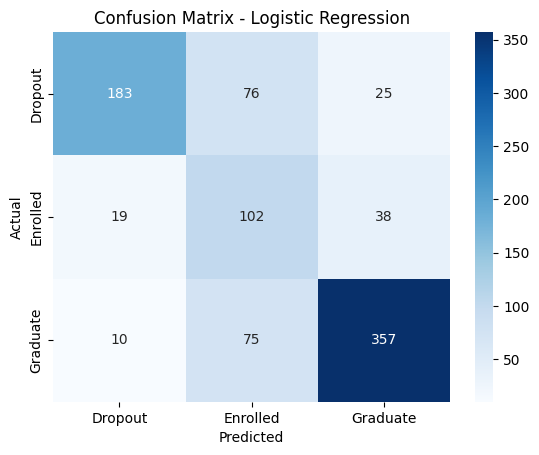

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_lr = trained_models['Logistic Regression']
y_pred_lr = model_lr.predict(X_test)

print("📊 Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred_lr, digits=4))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Support Vector Machine (SVM)**

📊 SVM - Classification Report
              precision    recall  f1-score   support

           0     0.8198    0.6408    0.7194       284
           1     0.4077    0.6667    0.5060       159
           2     0.8536    0.7783    0.8142       442

    accuracy                         0.7141       885
   macro avg     0.6937    0.6953    0.6798       885
weighted avg     0.7626    0.7141    0.7284       885



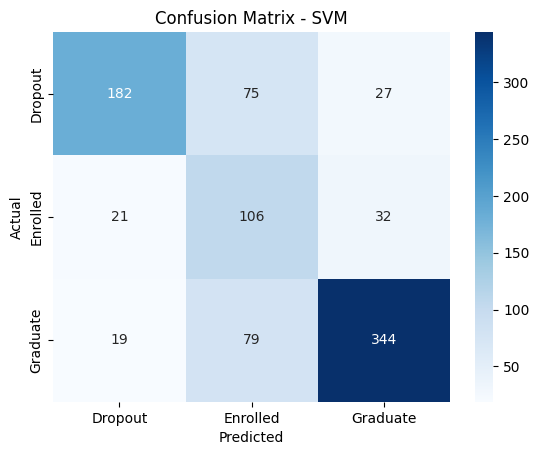

In [ ]:
model_svm = trained_models['SVM']
y_pred_svm = model_svm.predict(X_test)

print("📊 SVM - Classification Report")
print(classification_report(y_test, y_pred_svm, digits=4))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### **Random Forrest**

📊 Random Forest - Classification Report
              precision    recall  f1-score   support

           0     0.8069    0.7359    0.7698       284
           1     0.4437    0.4465    0.4451       159
           2     0.8197    0.8643    0.8414       442

    accuracy                         0.7480       885
   macro avg     0.6901    0.6822    0.6854       885
weighted avg     0.7481    0.7480    0.7472       885



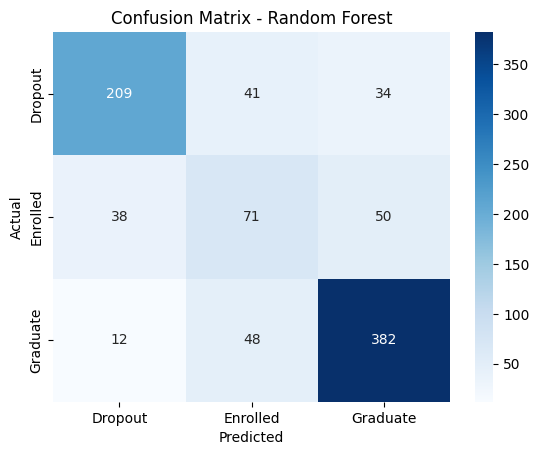

In [ ]:
model_rf = trained_models['Random Forest']
y_pred_rf = model_rf.predict(X_test)

print("📊 Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf, digits=4))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### **Decission Tree**

📊 Decision Tree - Classification Report
              precision    recall  f1-score   support

           0     0.7045    0.7218    0.7130       284
           1     0.3230    0.3270    0.3250       159
           2     0.7829    0.7670    0.7749       442

    accuracy                         0.6734       885
   macro avg     0.6035    0.6053    0.6043       885
weighted avg     0.6751    0.6734    0.6742       885



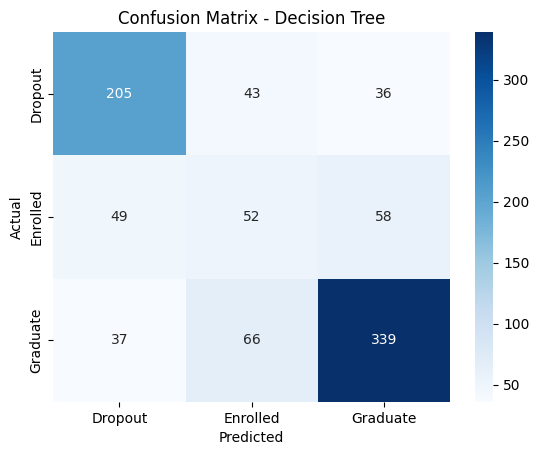

In [ ]:
model_dt = trained_models['Decision Tree']
y_pred_dt = model_dt.predict(X_test)

print("📊 Decision Tree - Classification Report")
print(classification_report(y_test, y_pred_dt, digits=4))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### **XGBoost**

📊 XGBoost - Classification Report
              precision    recall  f1-score   support

           0     0.7895    0.7394    0.7636       284
           1     0.4472    0.4528    0.4500       159
           2     0.8319    0.8620    0.8467       442

    accuracy                         0.7492       885
   macro avg     0.6895    0.6848    0.6868       885
weighted avg     0.7492    0.7492    0.7488       885



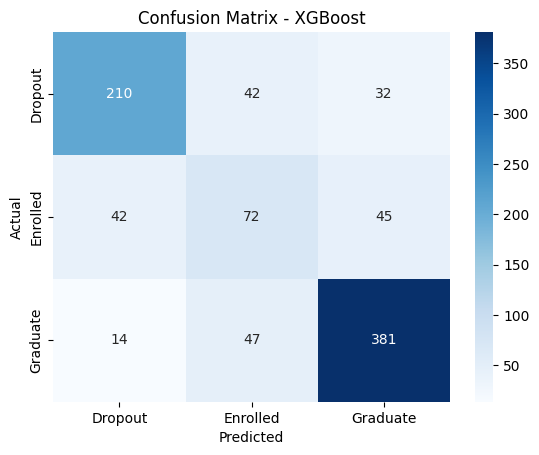

In [ ]:
model_xgb = trained_models['XGBoost']
y_pred_xgb = model_xgb.predict(X_test)

print("📊 XGBoost - Classification Report")
print(classification_report(y_test, y_pred_xgb, digits=4))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## **4.4 Analisis Performa Model**

Bagian ini akan memebrikan penjelasan sesuai output dari masing-masing model


### **1. Logistic Regression**

**Akurasi**: 72.5%  
**Macro F1-Score**: 68.7%

**Per Kelas:**
- **Graduate (2)**: Precision & recall tinggi (0.85 & 0.81) → diprediksi sangat baik.
- **Dropout (0)**: Precision tinggi (0.86), tapi recall sedang (0.64) → sebagian dropout terlewat.
- **Enrolled (1)**: Precision rendah (0.40), recall sedang (0.64) → banyak salah klasifikasi.

**Kesimpulan**:
Model cukup akurat untuk Dropout & Graduate, tapi kesulitan membedakan kelas Enrolled.  
Enrolled menjadi kelas yang paling sering tertukar, terutama dengan Dropout dan Graduate.



### **2. Support Vector Machine (SVM)**

**Akurasi**: 71.4%  
**Macro F1-Score**: 67.9%

**Per Kelas:**
- **Graduate (2)**: Precision tinggi (0.85), recall cukup baik (0.78) → konsisten.
- **Dropout (0)**: Precision 0.82, recall 0.64 → performa mirip Logistic Regression.
- **Enrolled (1)**: Precision masih rendah (0.41), tapi recall meningkat (0.67) → sedikit lebih baik dari LR.

**Kesimpulan:**
SVM menunjukkan hasil yang serupa dengan Logistic Regression, tetapi sedikit lebih baik pada kelas Enrolled dari segi recall. Graduate tetap diprediksi baik, dan Dropout stabil. Masalah utama tetap pada prediksi Enrolled yang sering tertukar.


### **3. Random Forest**

**Akurasi**: 74.8%  
**Macro F1-Score**: 68.5%

**Per Kelas:**
- **Graduate (2)**: Precision & recall tinggi (0.82 & 0.86) → sangat akurat.
- **Dropout (0)**: Precision 0.81, recall 0.74 → cukup seimbang.
- **Enrolled (1)**: Masih lemah (F1 hanya 0.44), precision & recall sama-sama rendah.

**Kesimpulan:**
Random Forest memberikan akurasi tertinggi sejauh ini. Model sangat kuat untuk kelas Graduate dan cukup solid untuk Dropout. Namun, kinerja untuk Enrolled masih menjadi titik lemah umum seperti pada model sebelumnya.


### **4. Decision Tree**

**Akurasi**: 67.3%  
**Macro F1-Score**: 60.4%

**Per Kelas:**
- **Graduate (2)**: Precision 0.78, recall 0.77 → stabil dan akurat.
- **Dropout (0)**: Precision 0.70, recall 0.72 → cukup baik dan seimbang.
- **Enrolled (1)**: Precision & recall sangat rendah (0.32) → kelas tersulit.

**Kesimpulan:**
Decision Tree menunjukkan performa yang paling rendah di antara model sejauh ini. Enrolled paling sering tertukar dengan Graduate & Dropout. Meskipun mudah diinterpretasikan, model ini tampak terlalu sederhana untuk data ini.


### **5. XGBoost**

**Akurasi**: 74.9%  
**Macro F1-Score**: 68.7%

**Per Kelas:**
- **Graduate (2)**: Precision 0.83, recall 0.86 → sangat solid.
- **Dropout (0)**: Precision 0.79, recall 0.74 → kuat dan seimbang.
- **Enrolled (1)**: Precision & recall sedang (0.45) → masih menjadi tantangan.

**Kesimpulan:**
XGBoost menjadi model dengan **akurasi dan macro F1 tertinggi** sejauh ini. Kinerja pada kelas Graduate dan Dropout sangat baik. Meskipun kelas Enrolled tetap sulit, performanya relatif lebih stabil dibanding model lainnya.


### **Ringkasan Performa Semua Model**

Berikut adalah perbandingan metrik utama dari kelima model klasifikasi yang telah diuji:

| Model               | Akurasi | Macro F1 | F1 Dropout | F1 Enrolled | F1 Graduate |
|---------------------|---------|----------|------------|-------------|-------------|
| Logistic Regression | 72.5%   | 68.7%    | 0.7379     | 0.4951      | 0.8283      |
| SVM                 | 71.4%   | 67.9%    | 0.7194     | 0.5060      | 0.8142      |
| Decision Tree       | 67.3%   | 60.4%    | 0.7130     | 0.3250      | 0.7749      |
| Random Forest       | 74.8%   | 68.5%    | 0.7698     | 0.4451      | 0.8414      |
| XGBoost             | **74.9%** | **68.7%** | 0.7636     | 0.4500      | **0.8467**  |

**Kesimpulan awal:**
- **XGBoost** dan **Random Forest** memberikan performa tertinggi secara keseluruhan.
- **Graduate** diprediksi dengan sangat baik oleh hampir semua model.
- **Enrolled** tetap menjadi kelas tersulit dan konsisten menunjukkan skor F1 terendah.
- Selisih akurasi antar model cukup tipis, namun **XGBoost memiliki macro F1 dan F1 Graduate tertinggi**.

Model-model top ini akan disempurnakan lebih lanjut melalui proses **Hyperparameter Tuning** pada bagian berikutnya.


## **4.5 Hyperparameter Tuning**


### **1. Random Forest**

Untuk meningkatkan performa model, dilakukan pencarian parameter terbaik menggunakan GridSearchCV. Proses ini mengeksplorasi berbagai kombinasi parameter Random Forest seperti jumlah pohon, kedalaman maksimum, dan jumlah fitur acak yang digunakan di setiap split.

Parameter yang diuji:
- `n_estimators`: Jumlah pohon (100, 200)
- `max_depth`: Kedalaman maksimum pohon (10, 20, None)
- `max_features`: Jumlah fitur acak di tiap split (sqrt, log2)

Pemilihan dilakukan menggunakan metrik `f1_macro` agar semua kelas memiliki bobot yang seimbang.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Inisialisasi model dasar
rf_base = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid, # Changed from param_grid_rf to param_grid
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Jalankan tuning
grid_rf.fit(X_resampled, y_resampled)

# Tampilkan hasil terbaik
print("Best Params (Random Forest):", grid_rf.best_params_)
print("Best f1_macro Score:", grid_rf.best_score_)

# Simpan model terbaik
best_rf = grid_rf.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params (Random Forest): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best f1_macro Score: 0.8428385417560429


Classification Report (Random Forest - Tuned):
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       284
           1       0.45      0.45      0.45       159
           2       0.82      0.87      0.84       442

    accuracy                           0.75       885
   macro avg       0.69      0.68      0.68       885
weighted avg       0.75      0.75      0.75       885



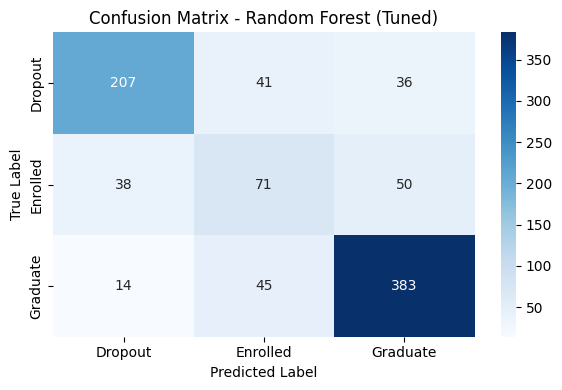

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi
y_pred_rf_tuned = best_rf.predict(X_test)

# Classification report
print("Classification Report (Random Forest - Tuned):")
print(classification_report(y_test, y_pred_rf_tuned))

# Confusion matrix
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


#### Perbandingan Random Forest: Default vs Tuning

Berikut adalah hasil perbandingan performa model Random Forest sebelum dan sesudah dilakukan hyperparameter tuning:

| Metrik        | Default       | Tuning |
|---------------|---------------|----------------|
| Accuracy      | 74.8%         | 75.0%          |
| Macro F1      | 68.5%         | 68.5%          |
| F1 Dropout    | 0.770         | 0.760          |
| F1 Enrolled   | 0.445         | 0.450          |
| F1 Graduate   | 0.841         | 0.840          |

**Kesimpulan:**
- Hasil menunjukkan bahwa tuning dengan grid parameter  **tidak memberikan peningkatan signifikan** dibanding versi default.
- Nilai akurasi dan macro F1 **tetap sama**.
- Random Forest default ternyata sudah cukup optimal untuk dataset ini.


### **2. XGBoost**

Untuk meningkatkan performa model XGBoost, dilakukan pencarian kombinasi parameter terbaik menggunakan GridSearchCV. Fokus tuning berada pada parameter yang paling berpengaruh terhadap overfitting dan kompleksitas model.

Parameter yang diuji:
- `n_estimators`: Jumlah pohon (100, 200)
- `max_depth`: Kedalaman pohon (3, 6, 10)
- `learning_rate`: Laju pembelajaran (0.01, 0.1, 0.2)
- `subsample`: Persentase data untuk setiap pohon (0.8, 1)
- `colsample_bytree`: Persentase fitur untuk setiap pohon (0.8, 1)

Evaluasi menggunakan metrik `f1_macro` dengan 5-fold cross-validation.


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk tuning
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Model XGBoost dasar
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# GridSearchCV
grid_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid_xgb,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Jalankan tuning
grid_xgb.fit(X_resampled, y_resampled)

# Tampilkan hasil terbaik
print("Best Params (XGBoost):", grid_xgb.best_params_)
print("Best f1_macro Score:", grid_xgb.best_score_)

# Simpan model terbaik
best_xgb = grid_xgb.best_estimator_


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:16:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params (XGBoost): {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Best f1_macro Score: 0.8273483693712824


Classification Report (XGBoost - Tuned):
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       284
           1       0.42      0.40      0.41       159
           2       0.82      0.85      0.84       442

    accuracy                           0.74       885
   macro avg       0.67      0.67      0.67       885
weighted avg       0.73      0.74      0.74       885



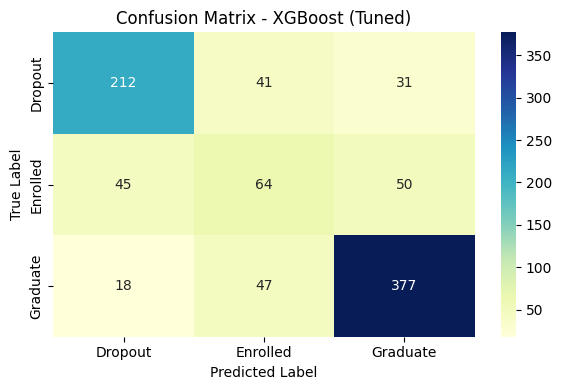

In [ ]:
# Prediksi
y_pred_xgb_tuned = best_xgb.predict(X_test)

# Classification report
print("Classification Report (XGBoost - Tuned):")
print(classification_report(y_test, y_pred_xgb_tuned))

# Confusion matrix
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

# Visualisasi
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.title('Confusion Matrix - XGBoost (Tuned)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


## **4.6. Interpretasi Model Terbaik dengan**

Untuk memahami lebih dalam mengapa model XGBoost membuat prediksi tertentu, digunakan SHAP (SHapley Additive exPlanations). SHAP menjelaskan kontribusi masing-masing fitur terhadap output model, baik secara global maupun lokal (per observasi).

**Alasan Penggunaan SHAP:**
- Membantu **mengidentifikasi fitur paling berpengaruh**
- Mendukung **pengambilan keputusan berbasis data**
- Meningkatkan **transparansi dan kepercayaan** terhadap model

Visualisasi utama:
- **Summary Plot (Global Feature Importance)**
- (Opsional) Force plot untuk interpretasi individu


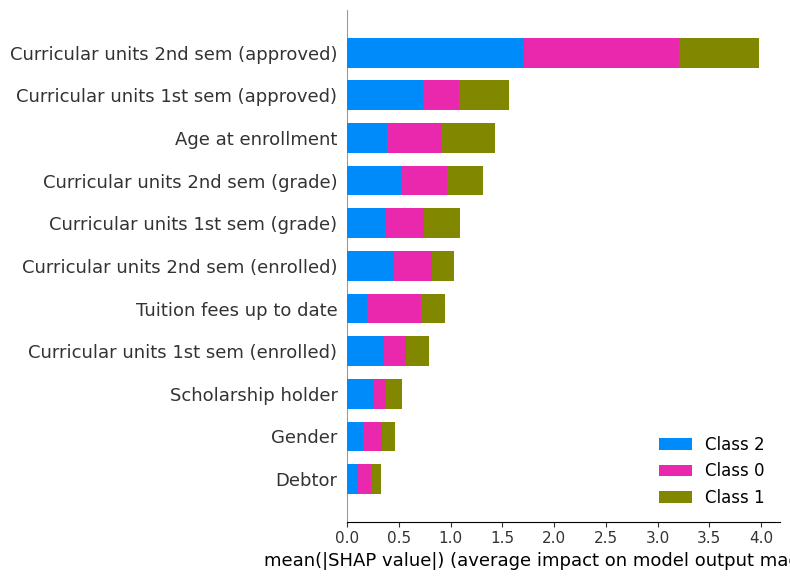

In [ ]:
import shap

# Inisialisasi explainer untuk model XGBoost
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

# Plot global summary
shap.summary_plot(shap_values, X_test, plot_type='bar')


Berdasarkan visualisasi SHAP, dapat disimpulkan bahwa fitur-fitur berikut memiliki pengaruh paling signifikan terhadap prediksi model XGBoost:

**Fitur Paling Berpengaruh (Global Importance):**
1. **Curricular units 2nd sem (approved)** — fitur paling dominan dalam membedakan mahasiswa yang lulus (Class 2)
2. **Curricular units 1st sem (approved)** — penting untuk semua kelas (lulus, dropout, enrolled)
3. **Age at enrollment** — mahasiswa yang lebih tua cenderung tidak lulus tepat waktu
4. **Rata-rata nilai di semester 1 & 2** (grade) — berkaitan langsung dengan performa akademik
5. **Jumlah matkul diambil** — mengindikasikan keterlibatan akademik

**Observasi Tambahan:**
- Fitur **"Tuition fees up to date"** juga memberi sinyal kuat terhadap risiko dropout (Class 0)
- Fitur seperti **Scholarship holder**, **Gender**, dan **Debtor** juga masuk 10 besar, tapi pengaruhnya lebih kecil
- Kelas warna:
  - Biru → Graduate
  - Merah muda → Dropout
  - Hijau zaitun → Enrolled

**Kesimpulan:**
- Mahasiswa yang **aktif, lulus banyak mata kuliah, dan mendapatkan nilai baik** di dua semester pertama lebih besar kemungkinan untuk **lulus**
- Sedangkan keterlambatan pembayaran dan beban akademik yang rendah cenderung mengarah ke **dropout**

Interpretasi ini dapat menjadi dasar peringatan dini dan intervensi kebijakan pada sistem pendidikan tinggi.


# **5. Kesimpulan**

Proyek ini bertujuan untuk memprediksi status akhir mahasiswa—Dropout, Enrolled, atau Graduate—berdasarkan data demografis, akademik, dan sosial ekonomi yang tersedia sejak awal pendaftaran.

## **Hasil Utama:**
- Model terbaik adalah **XGBoost (Default)** dengan akurasi 74.9% dan macro F1-score 68.7%.
- Meskipun nilai akurasi terlihat sedang, hal ini **wajar dalam konteks klasifikasi multikelas**, di mana model harus membedakan lebih dari dua kelas yang saling tumpang tindih.
- Kelas "Enrolled" menjadi yang paling sulit diprediksi karena secara karakteristik sering tumpang tindih antara kategori dropout dan graduate.

## **Fitur Paling Berpengaruh:**
- **Jumlah matkul lulus** di semester 1 dan 2
- **Rata-rata nilai akademik**
- **Usia saat masuk**
- **Status pembayaran biaya kuliah**

## **Implikasi:**
- Mahasiswa dengan performa akademik baik sejak awal berpeluang besar untuk lulus tepat waktu.
- Temuan ini dapat digunakan sebagai sistem peringatan dini oleh institusi pendidikan untuk mengintervensi mahasiswa berisiko tinggi dropout.

## **Rekomendasi Lanjutan:**
- Integrasi model dalam sistem monitoring akademik.
- Perbaikan distribusi data dan eksplorasi teknik semi-supervised untuk menangani label "enrolled".
- Perluasan pendekatan **explainable AI (SHAP)** untuk analisis individual.